# Constant DOS

100%|█████████████████████████████████████████| 200/200 [16:26<00:00,  4.93s/it]


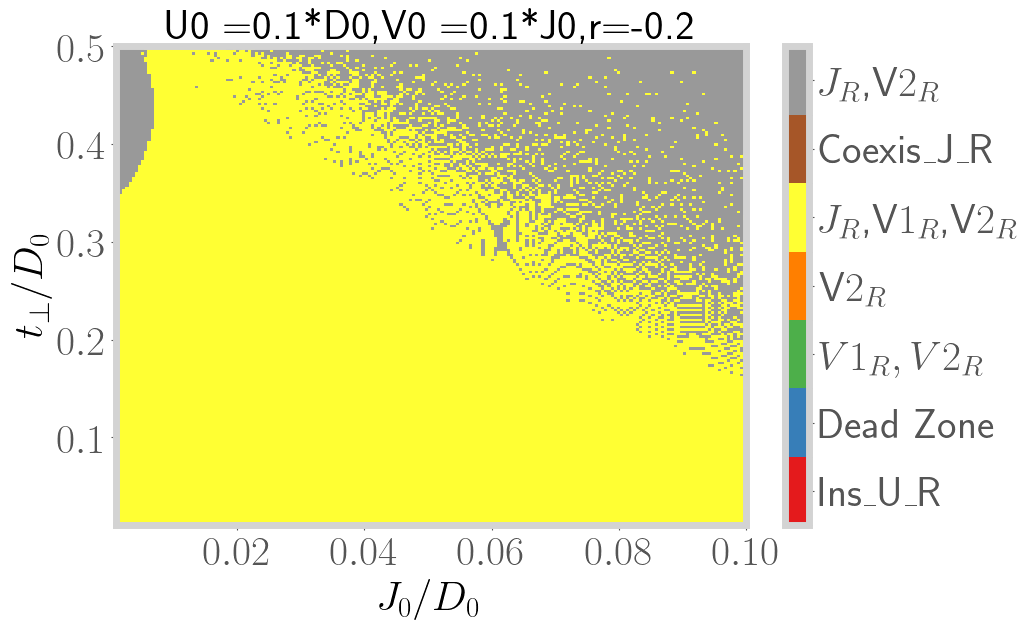

In [10]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.2
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [15:37<00:00,  4.69s/it]


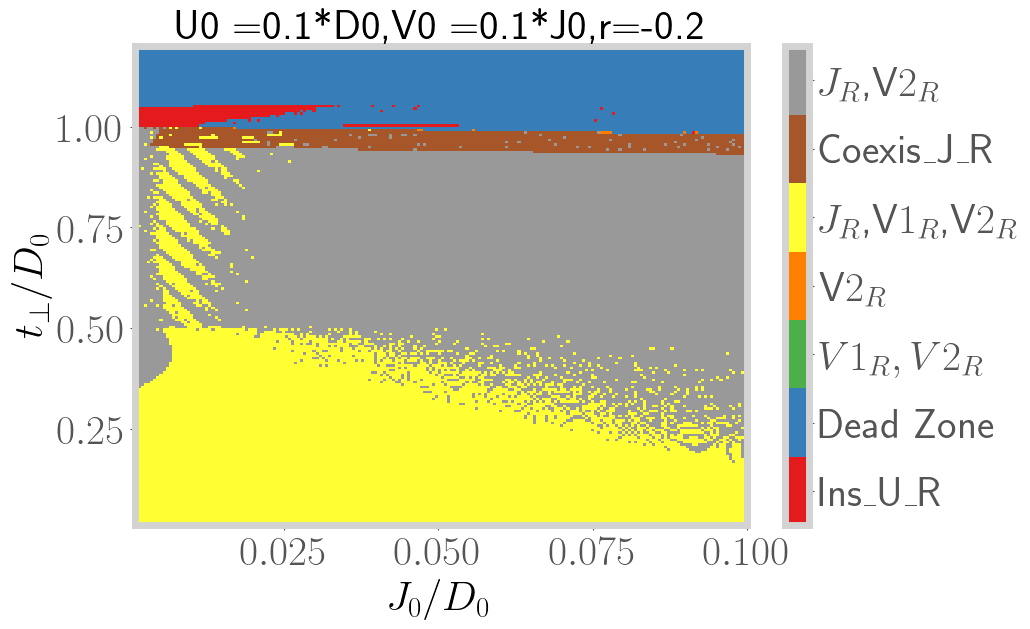

In [9]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 1.2, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.2
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [16:57<00:00,  5.09s/it]


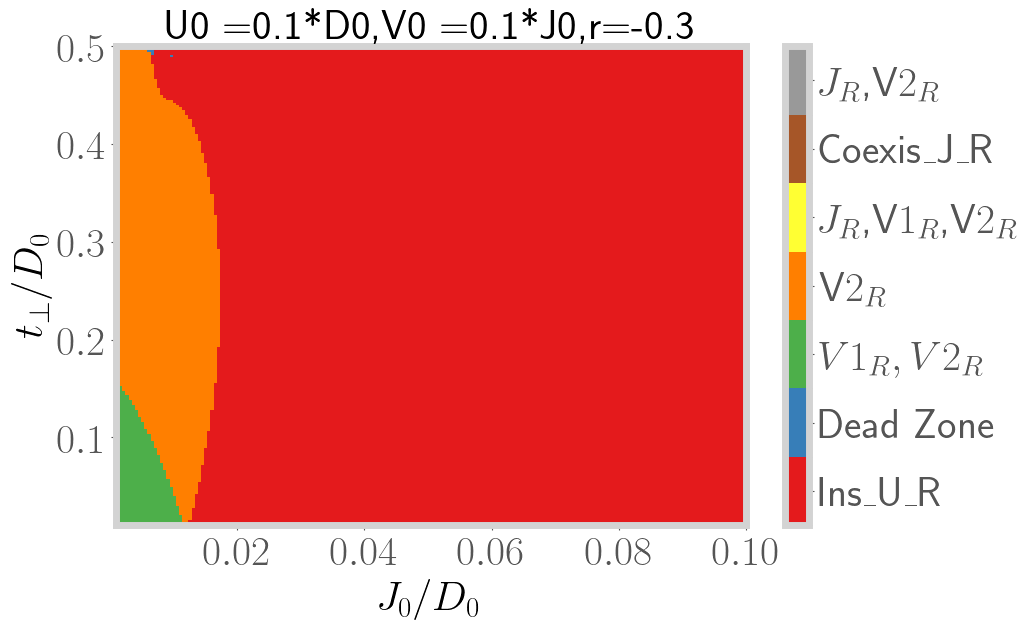

In [7]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.3
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.92it/s]


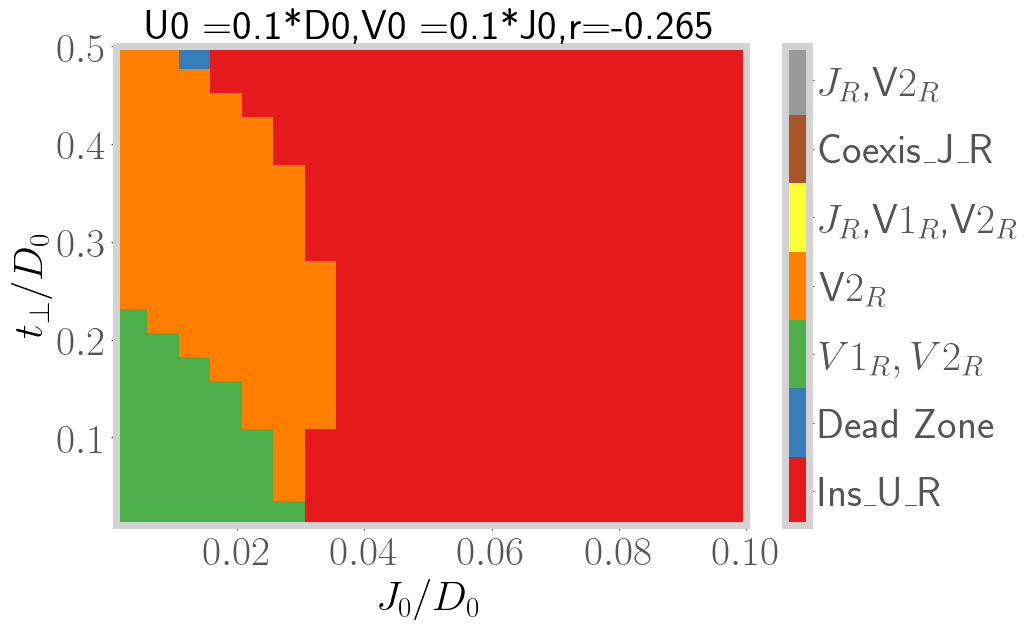

In [9]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 20) * D0
#print(y)
x = np.linspace(0.01, 0.5, 20) * D0
V_by_J = 0.1
U_b_by_J = -0.265
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [17:14<00:00,  5.17s/it]


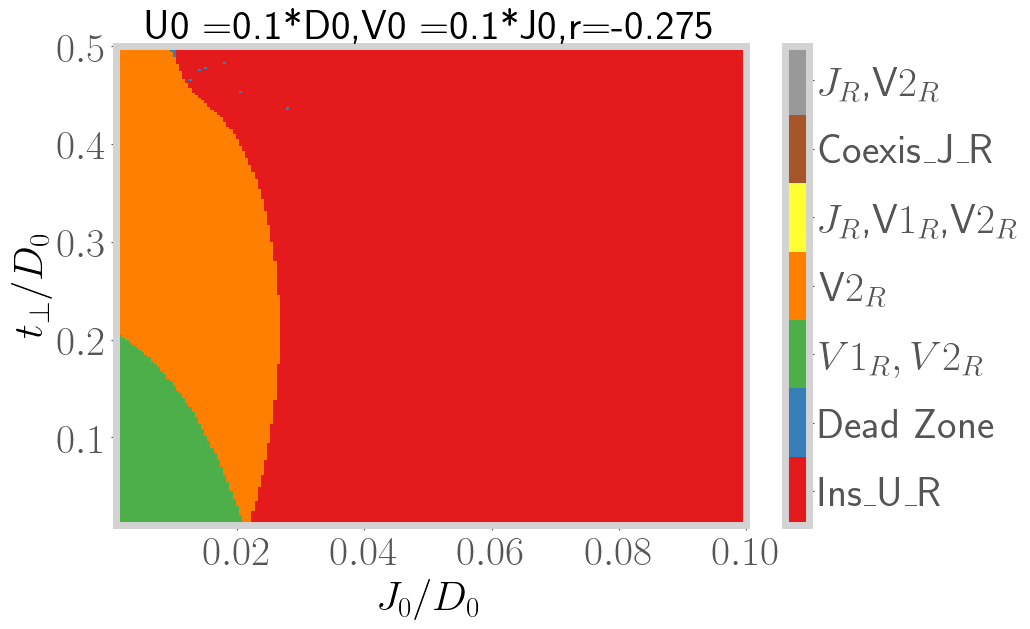

In [8]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.275
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [16:51<00:00,  5.06s/it]


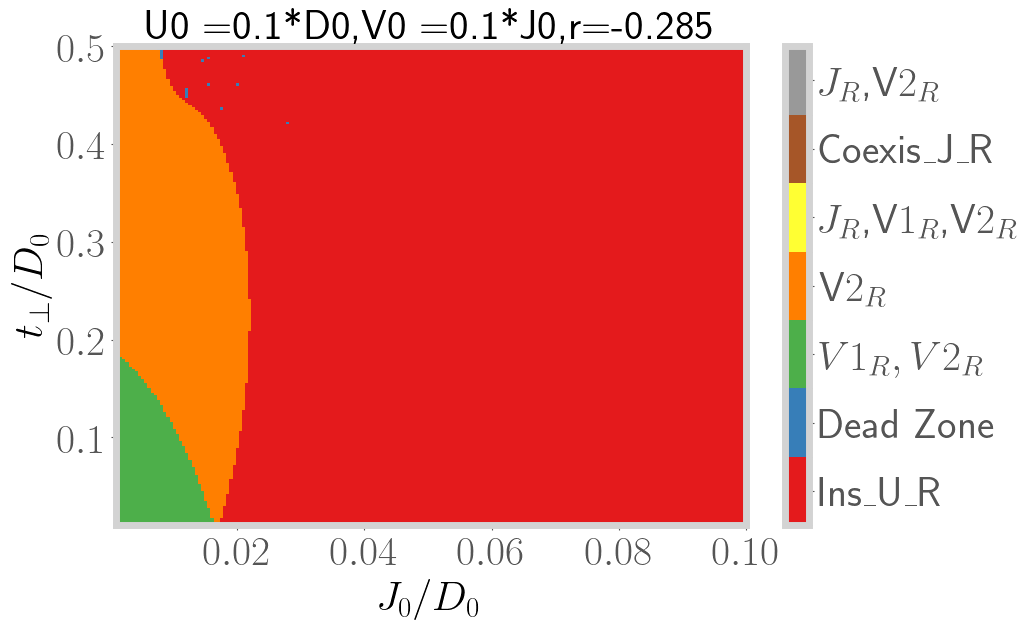

In [9]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.285
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [17:02<00:00,  5.11s/it]


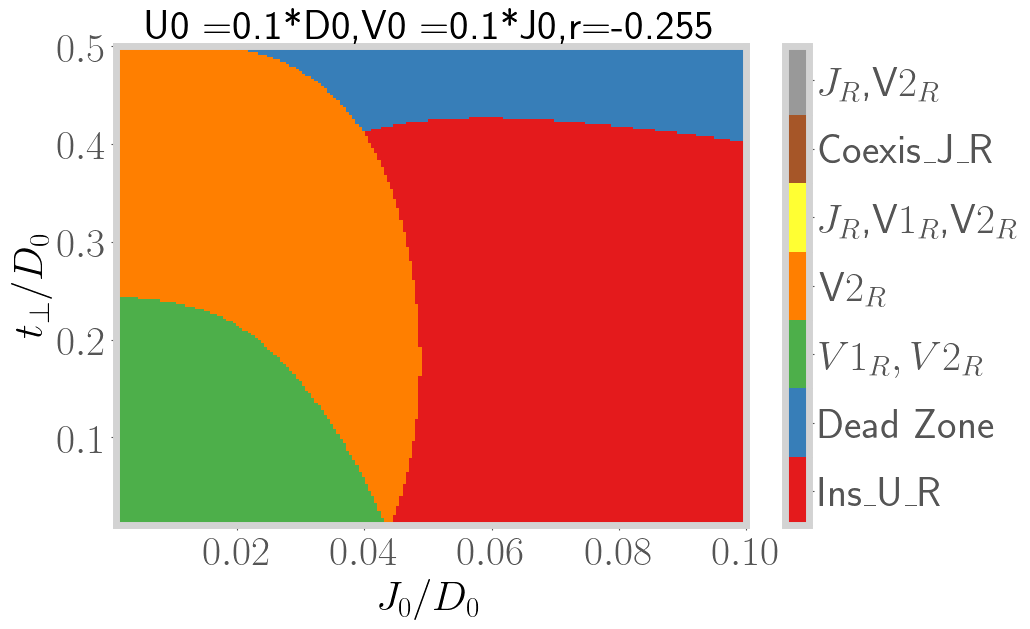

In [3]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.255
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [16:32<00:00,  4.96s/it]


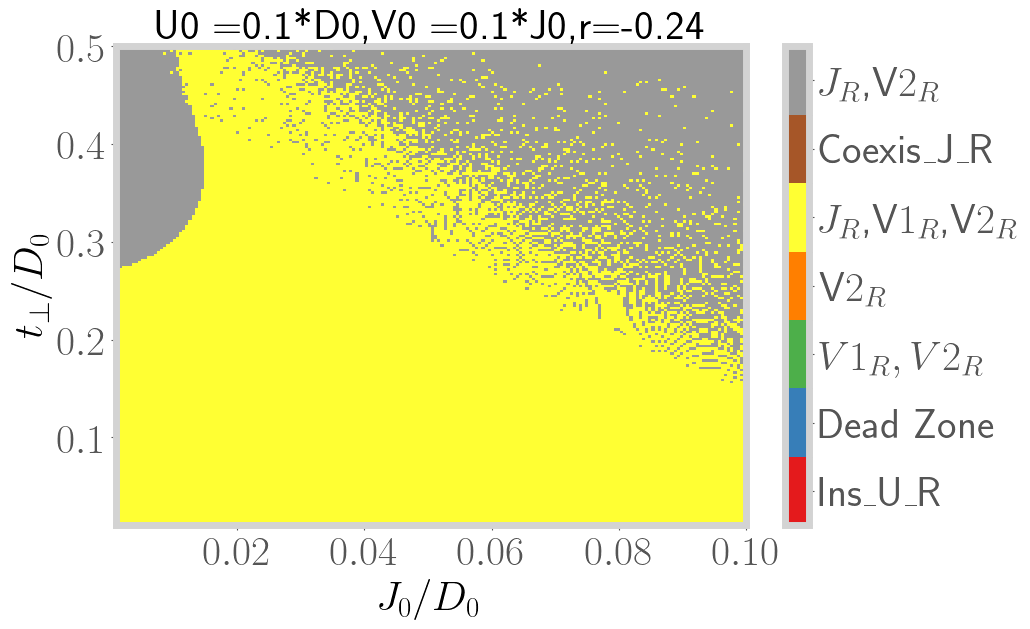

In [5]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.24
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [15:25<00:00,  4.63s/it]


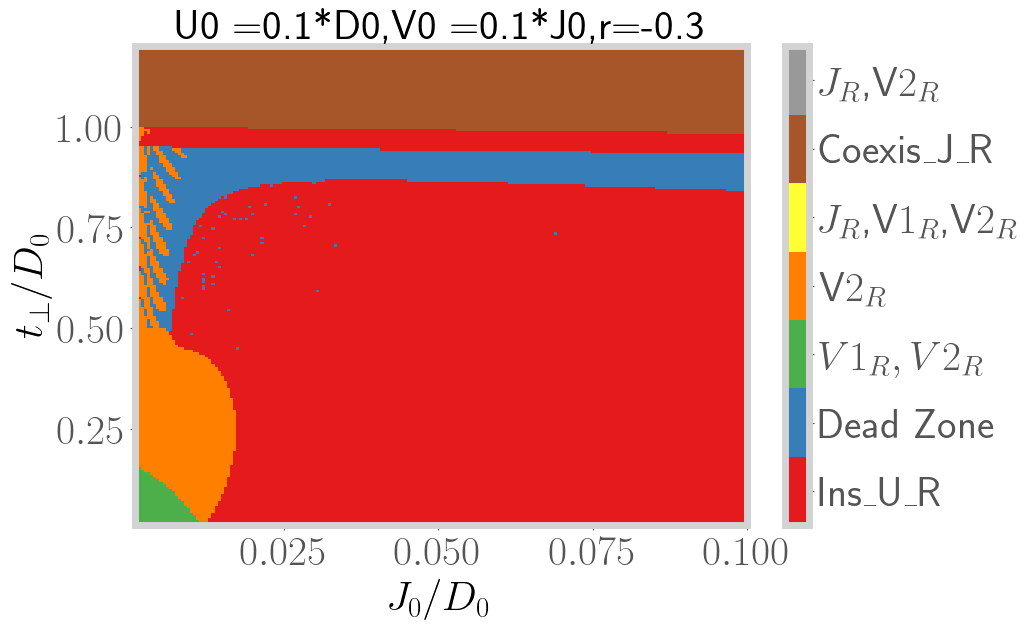

In [6]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 1.2, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.3
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [16:51<00:00,  5.06s/it]


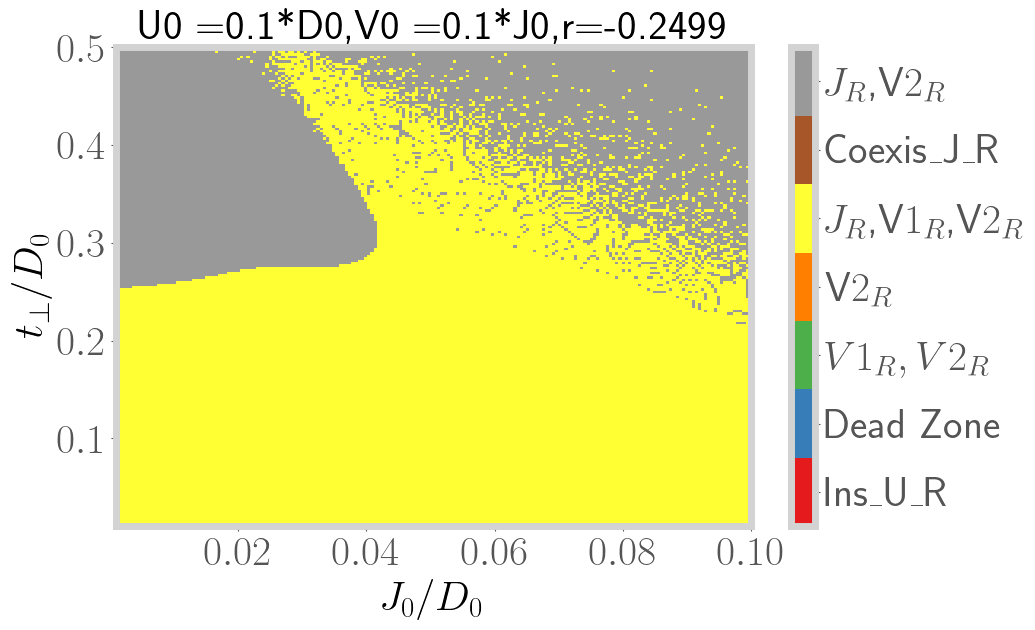

In [3]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.2499
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [17:09<00:00,  5.15s/it]


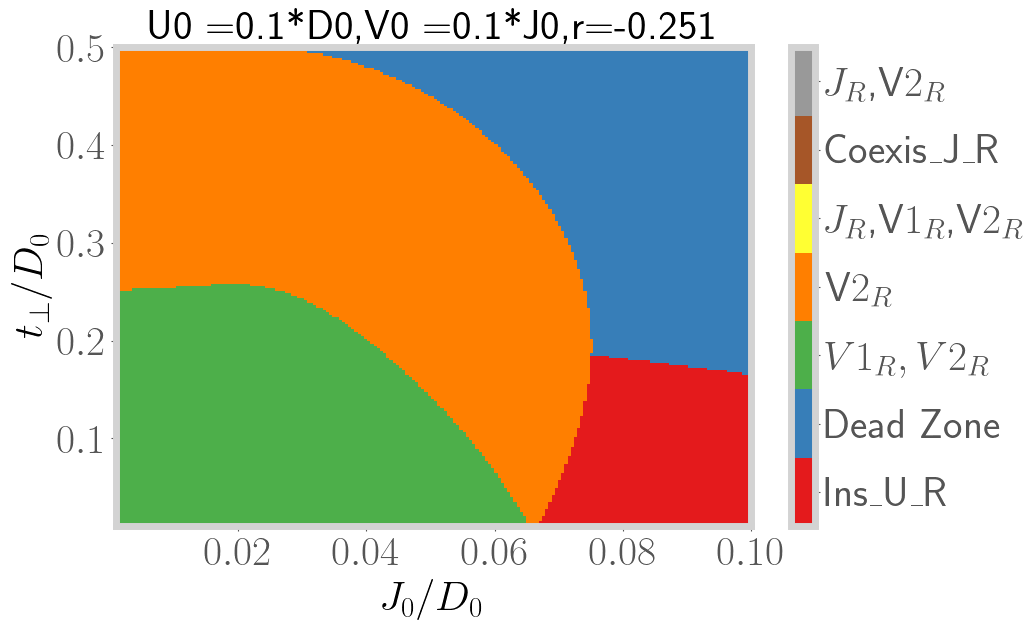

In [2]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.251
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

In [5]:
## Changing V0/J0

100%|█████████████████████████████████████████| 200/200 [17:03<00:00,  5.12s/it]


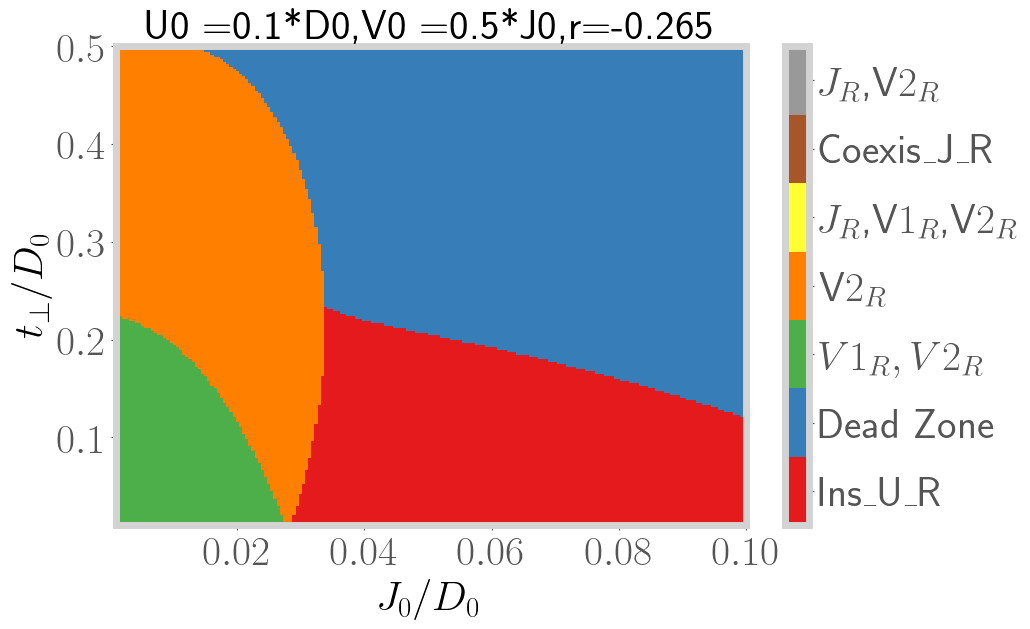

In [10]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.5
U_b_by_J = -0.265
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [17:19<00:00,  5.20s/it]


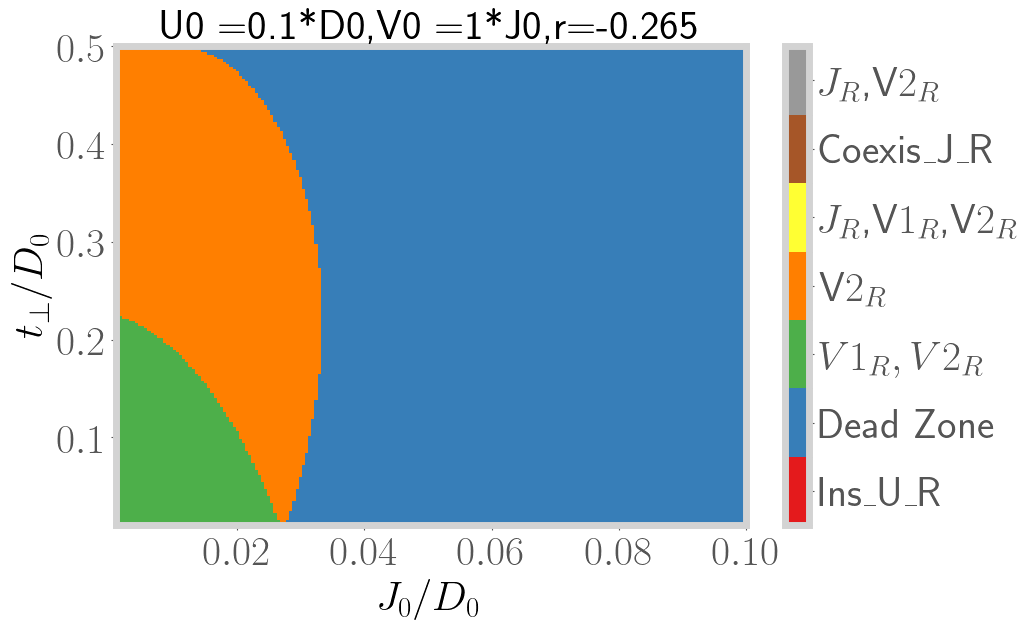

In [11]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 1
U_b_by_J = -0.265
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

In [8]:
## Changing U_b/J0

100%|█████████████████████████████████████████| 200/200 [17:04<00:00,  5.12s/it]


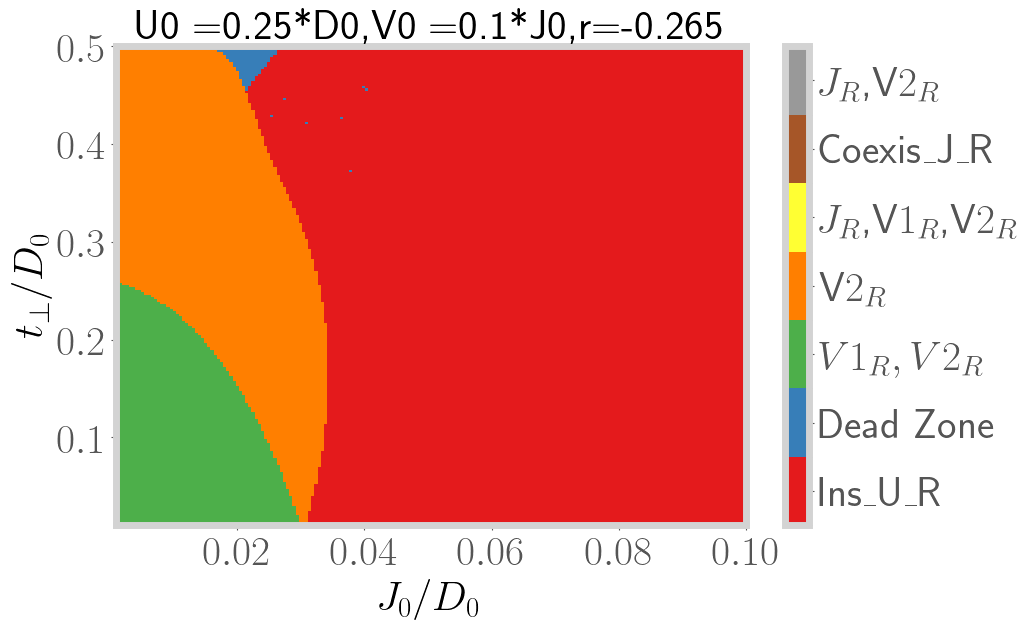

In [12]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.25 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.265
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [17:13<00:00,  5.17s/it]


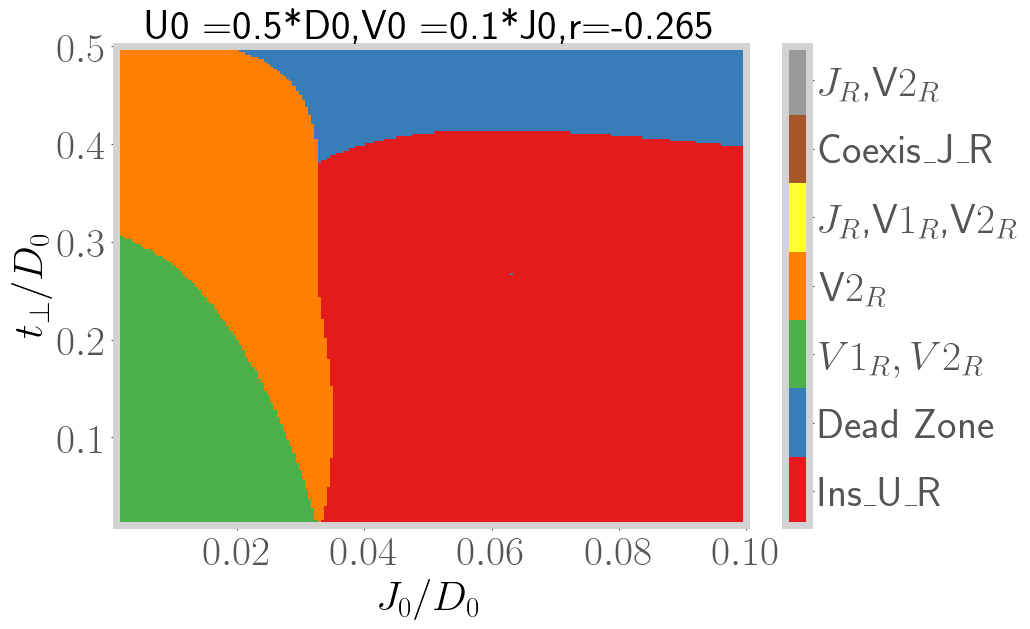

In [13]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.5 * D0
y = np.linspace(0.001, 0.1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.265
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

In [ ]:
##### Correspondinfg RG Flows in different regions

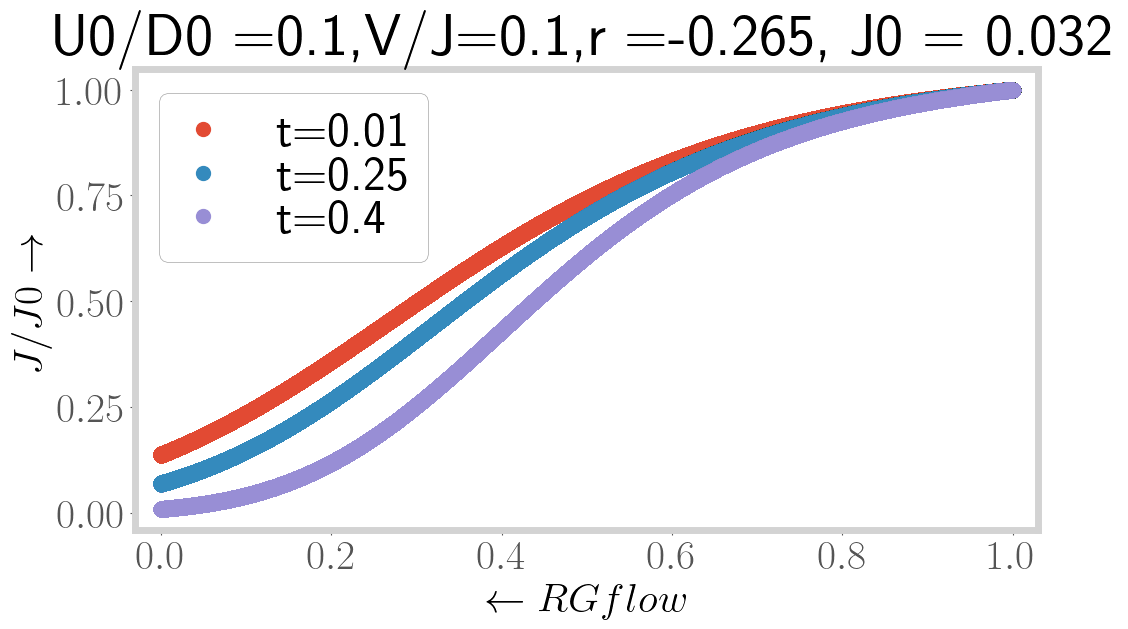

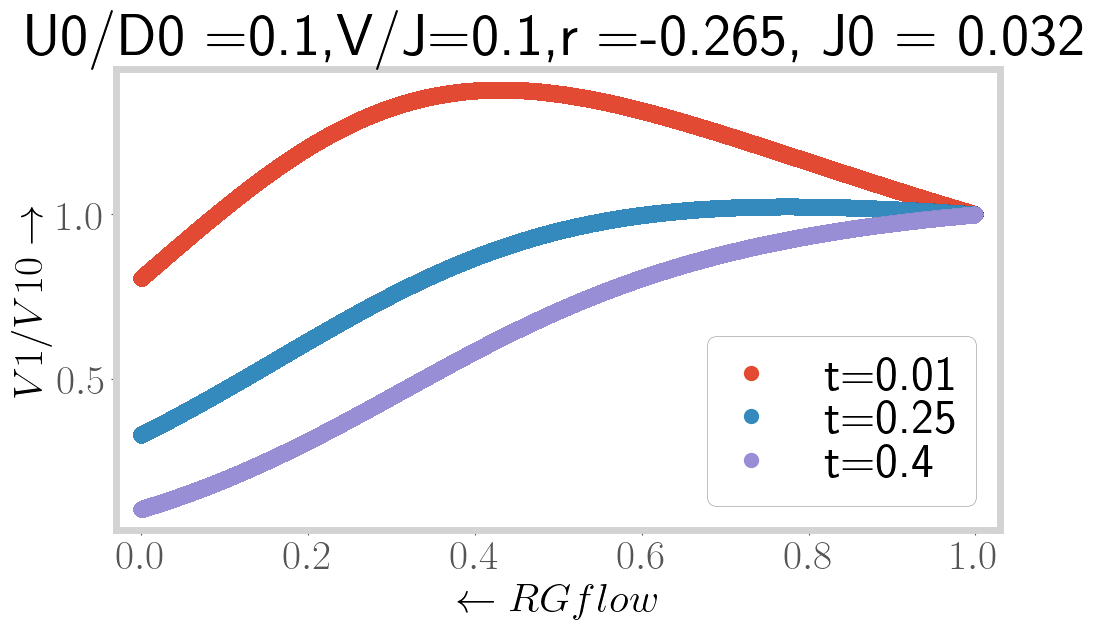

[1.         1.00000004 1.00000008 ... 0.8486716  0.84867148 0.84867137]
[1.         1.00000007 1.00000015 ... 1.10463632 1.10463606 1.1046358 ]
[1.         1.00000011 1.00000021 ... 0.23564641 0.23564606 0.23564571]


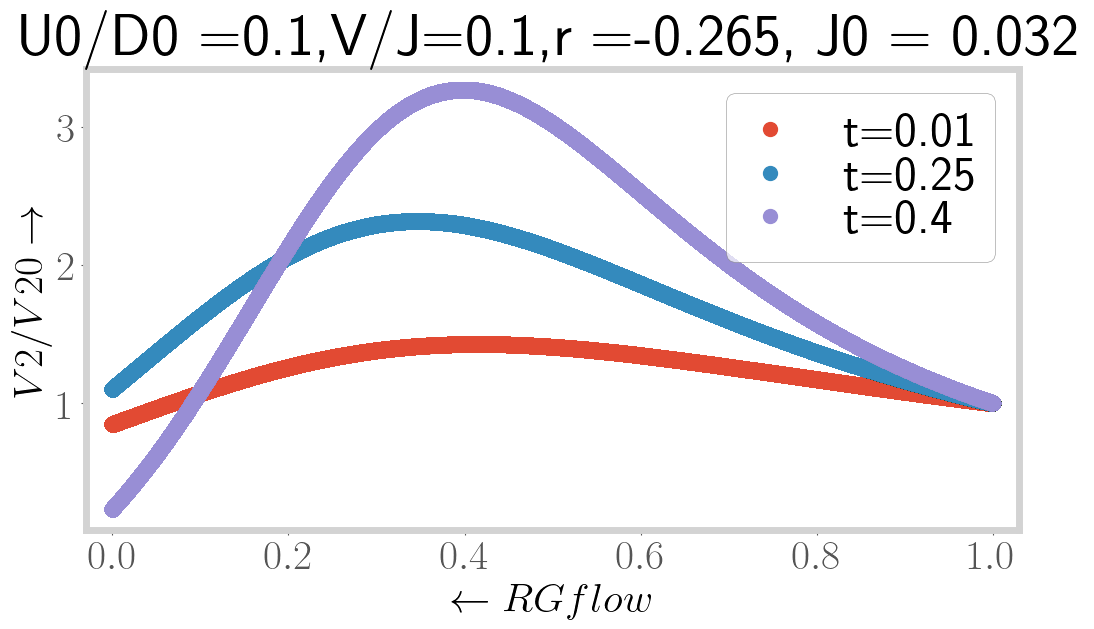

[1.         1.0000001  1.0000002  ... 2.20282011 2.20282011 2.20282011]
[1.         1.00000011 1.00000022 ... 2.08410579 2.08410578 2.08410577]
[1.         1.00000012 1.00000024 ... 1.70668393 1.70668392 1.70668392]


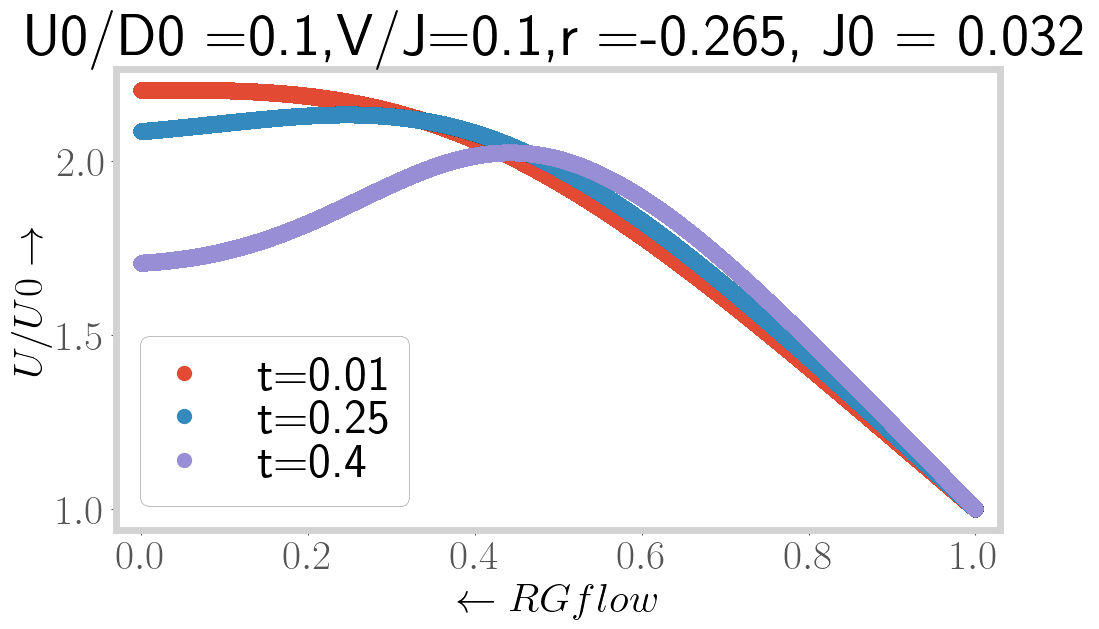

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.01,0.25,0.4])
D0 = 100
J0 = D0 * 0.032
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.265 * J0
t_s = a * D0
d = 0.000005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

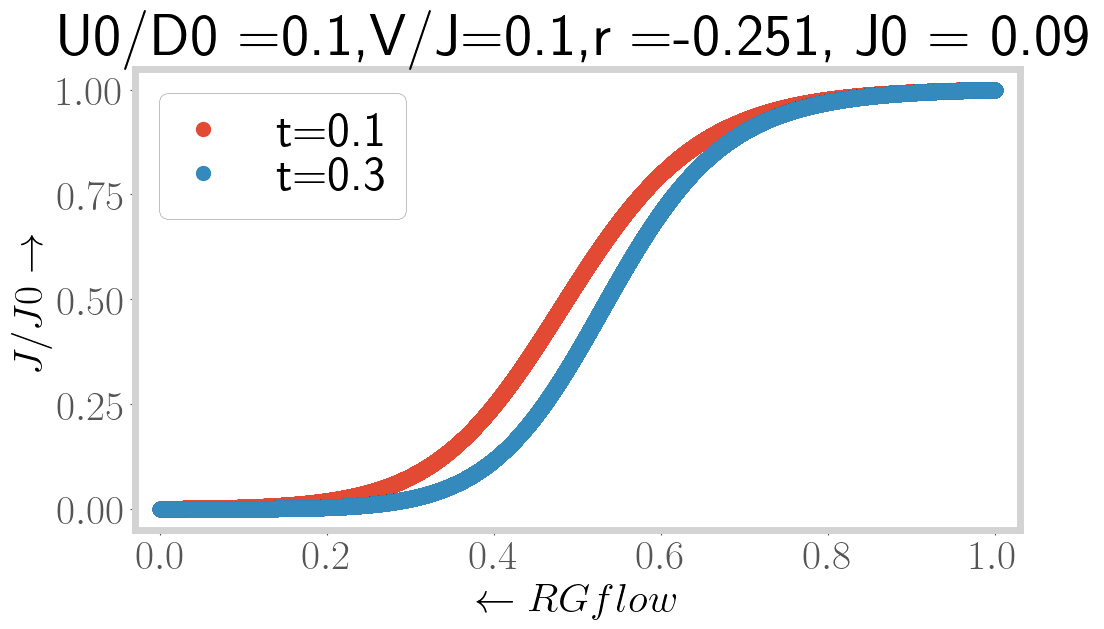

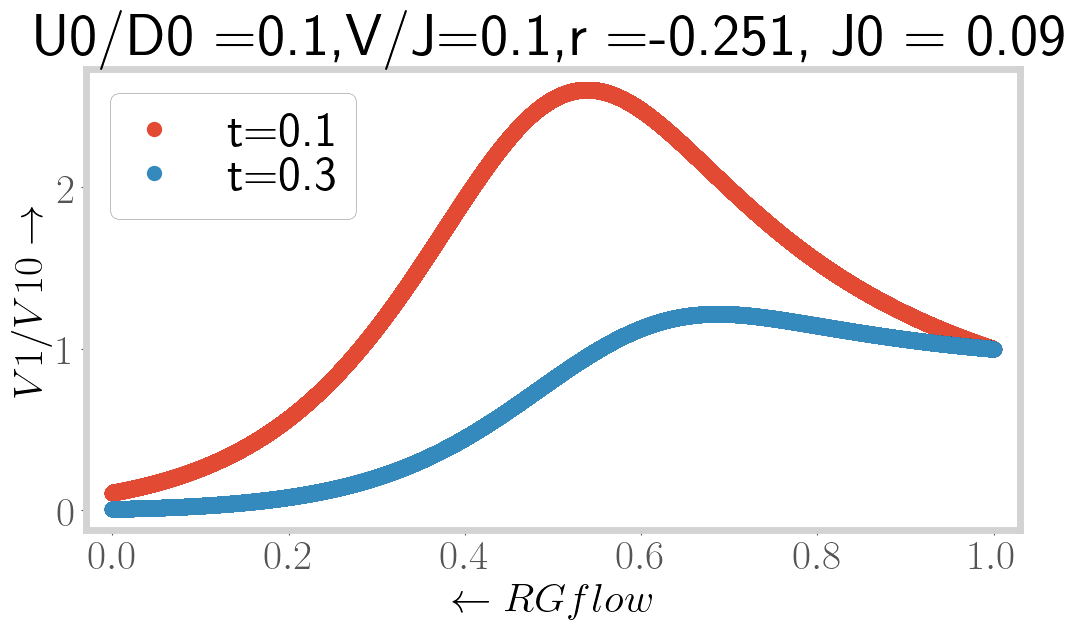

[1.         1.00001619 1.00003239 ... 0.30137423 0.30135971 0.30134519]
[1.         1.00002568 1.00005135 ... 0.20273099 0.20271702 0.20270304]


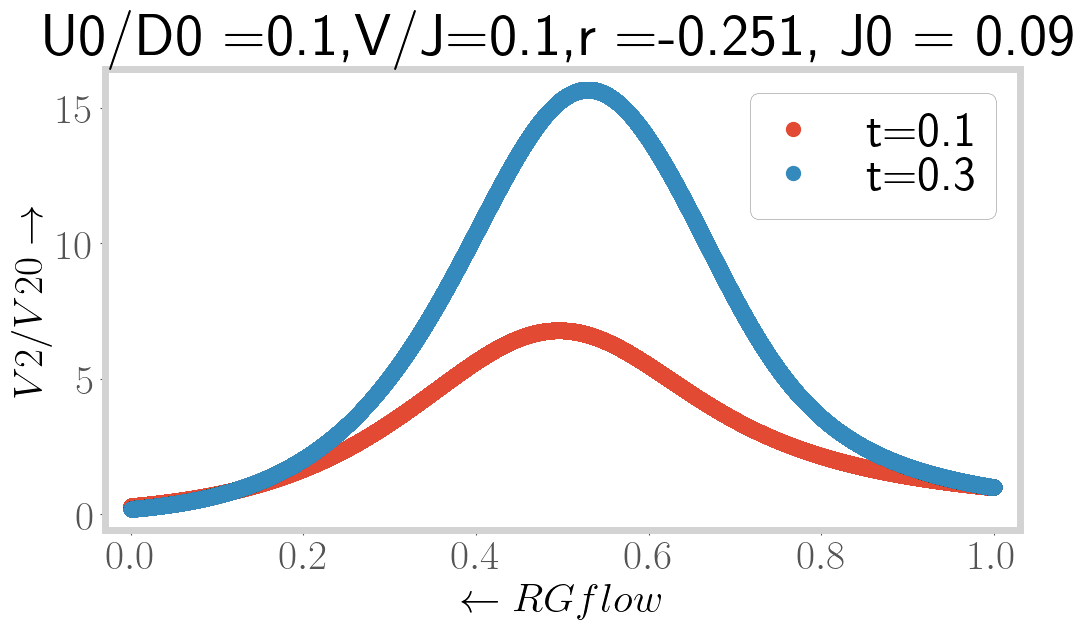

[1.         1.00008242 1.00016484 ... 1.29880163 1.29880143 1.29880124]
[1.         1.00008978 1.00017956 ... 0.         0.         0.        ]


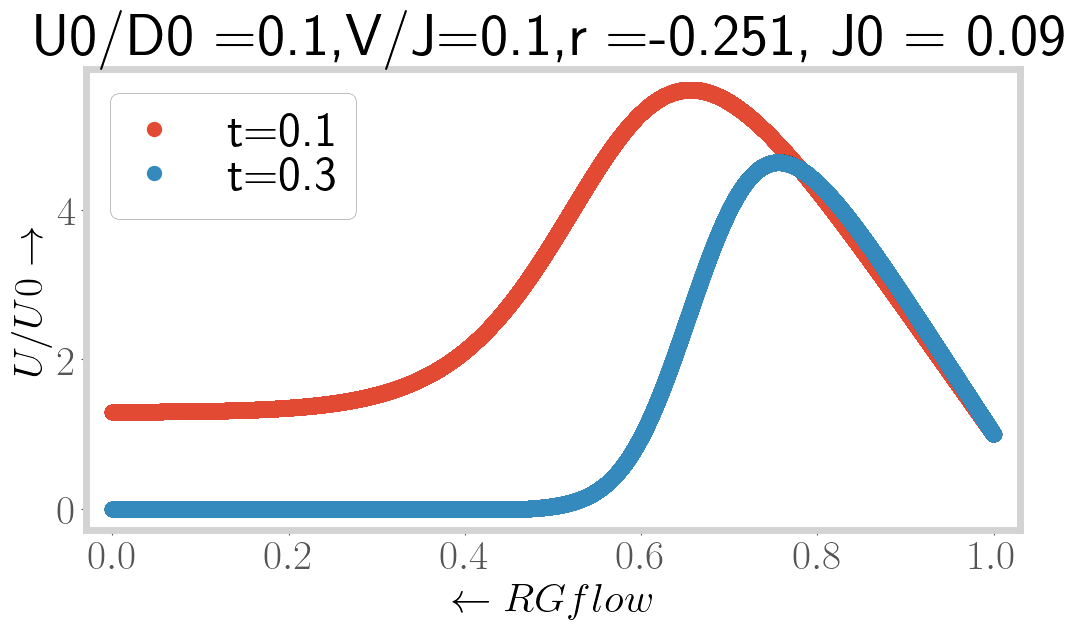

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.1,0.3])
D0 = 100
J0 = D0 * 0.09
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.251 * J0
t_s = a * D0
d = 0.0005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

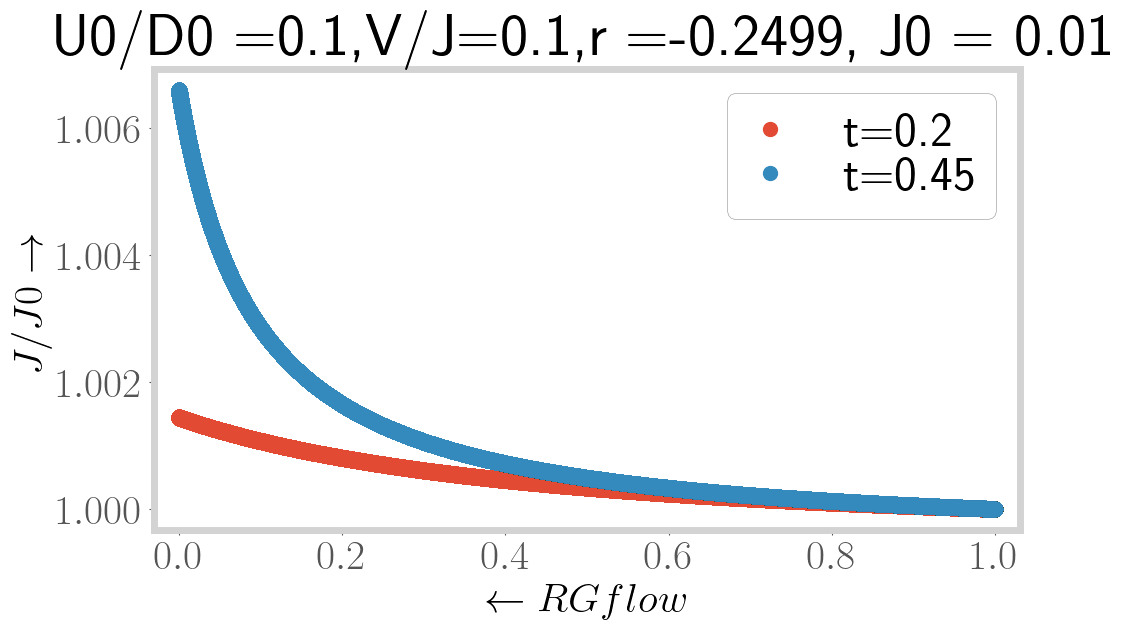

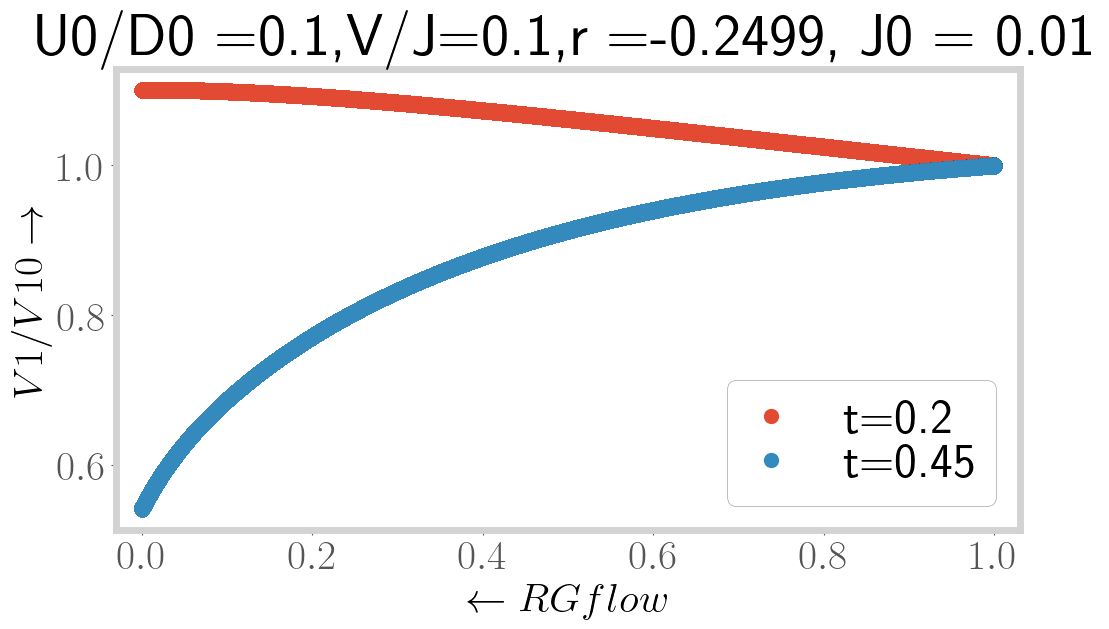

[1.         1.00000002 1.00000004 ... 2.21867004 2.21867021 2.21867039]
[ 1.          1.00000004  1.00000008 ... 21.28361928 21.28363114
 21.28364299]


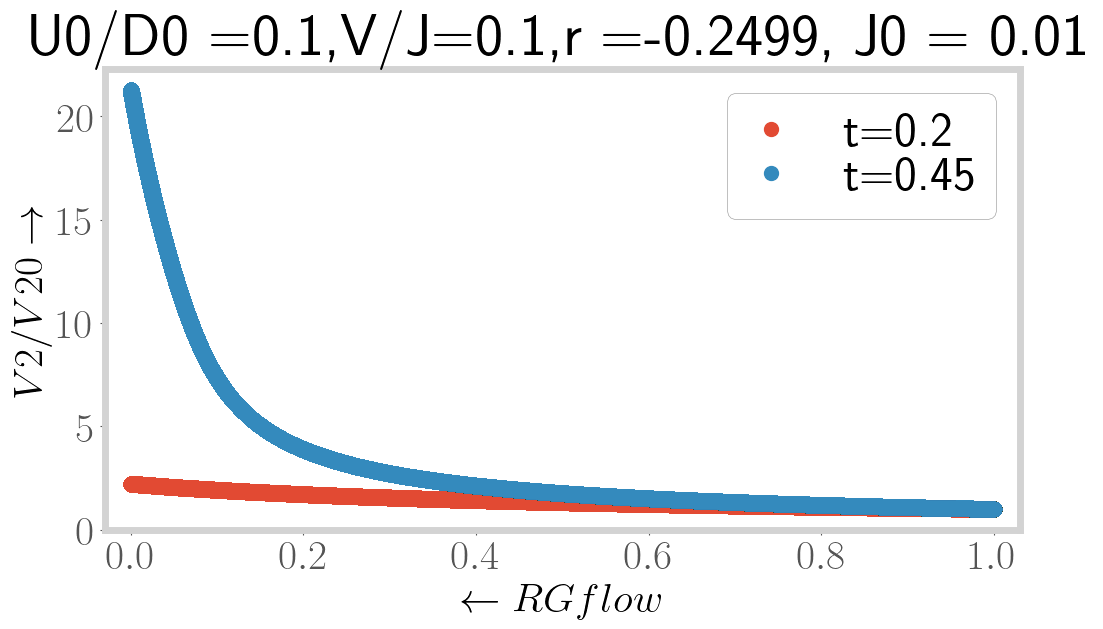

[1.         1.00000001 1.00000002 ... 1.29517858 1.2951786  1.29517862]
[1.         1.00000001 1.00000002 ... 0.14176319 0.14176266 0.14176213]


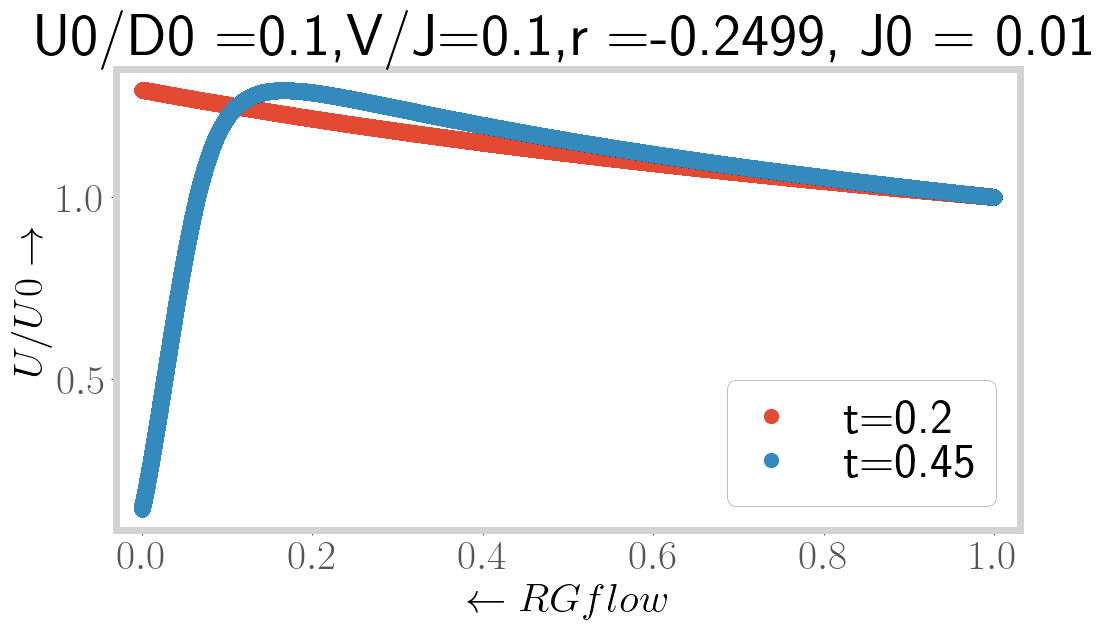

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.2,0.45])
D0 = 100
J0 = D0 * 0.01
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.2499 * J0
t_s = a * D0
d = 0.000005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

[1.         1.00000001 1.00000002 ... 1.29517858 1.2951786  1.29517862]
[1.         1.00000001 1.00000003 ... 0.         0.         0.        ]


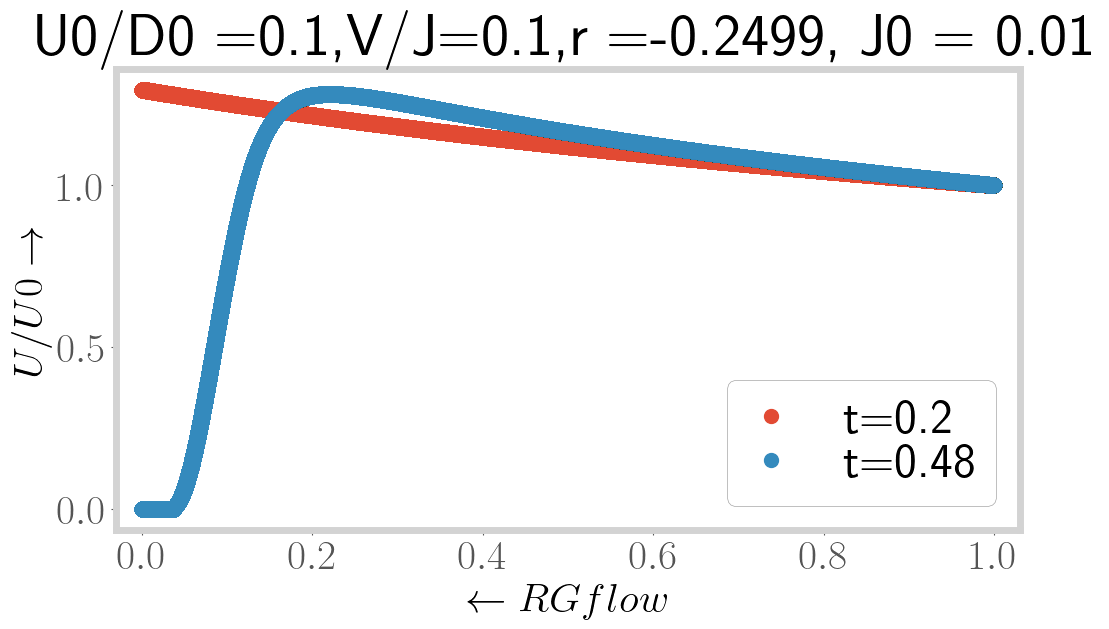

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.2,0.48])
D0 = 100
J0 = D0 * 0.01
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.2499 * J0
t_s = a * D0
d = 0.000005  
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

[1.         1.00000001 1.00000002 ... 1.32589352 1.32589355 1.32589357]


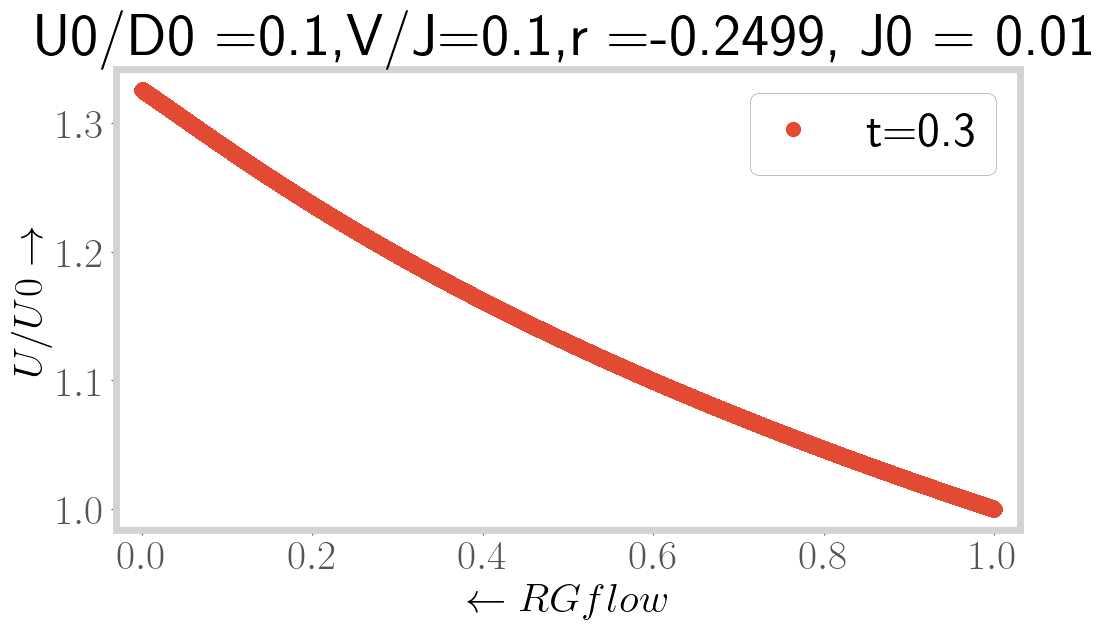

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.3])
D0 = 100
J0 = D0 * 0.01
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.2499 * J0
t_s = a * D0
d = 0.000005  
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

[1.         1.00000001 1.00000002 ... 1.33530267 1.33530268 1.33530269]


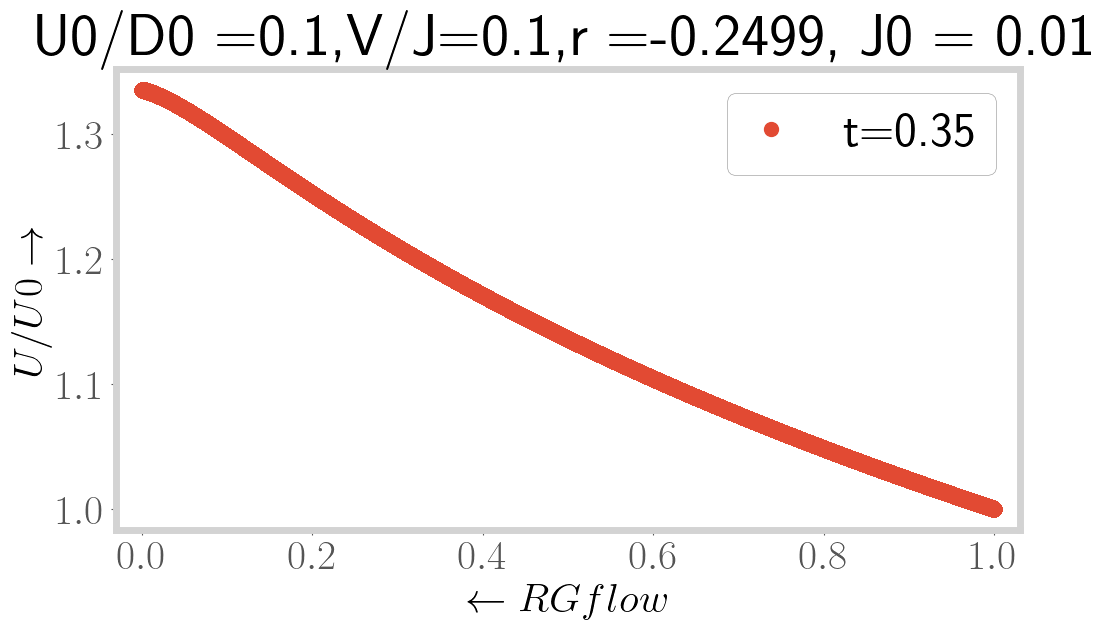

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.35])
D0 = 100
J0 = D0 * 0.01
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.2499 * J0
t_s = a * D0
d = 0.000005  
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()
'''
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

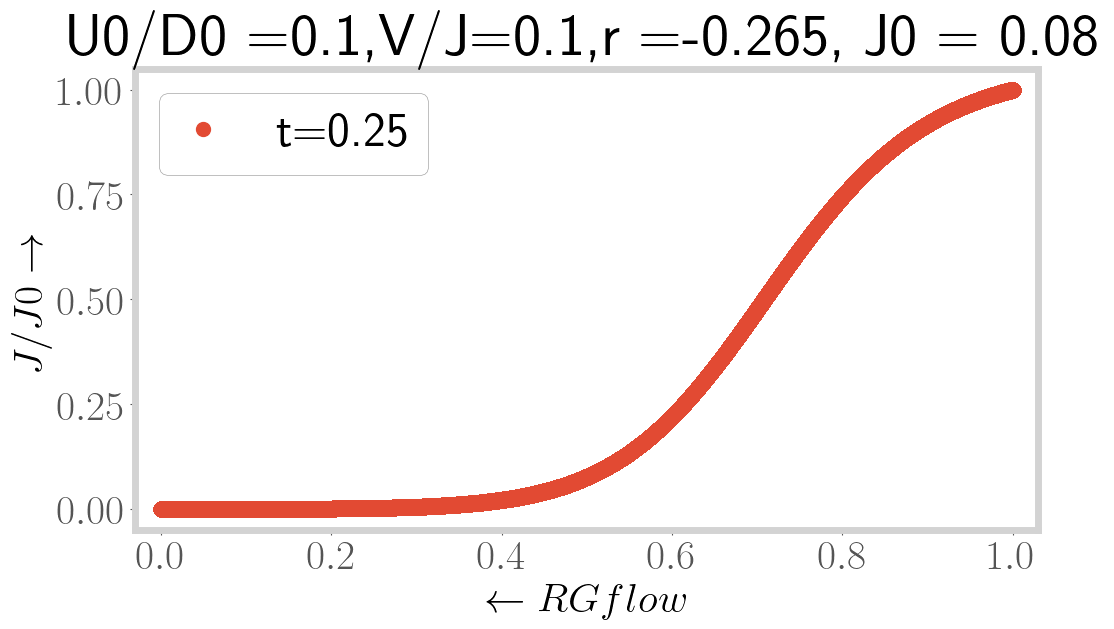

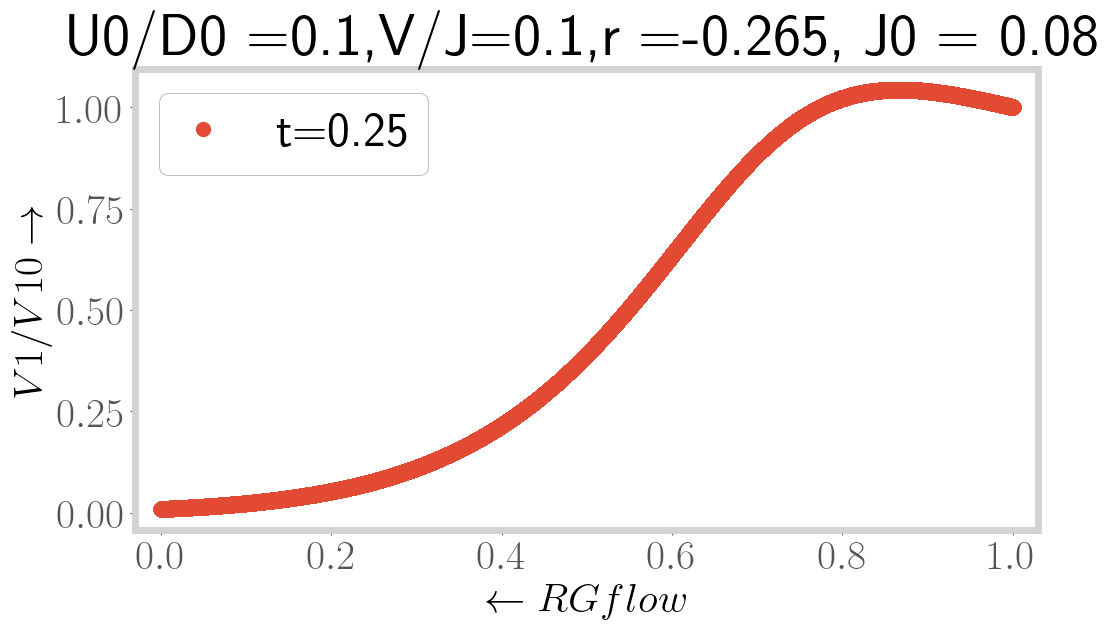

[1.         1.00000019 1.00000038 ... 0.00471915 0.00471915 0.00471914]


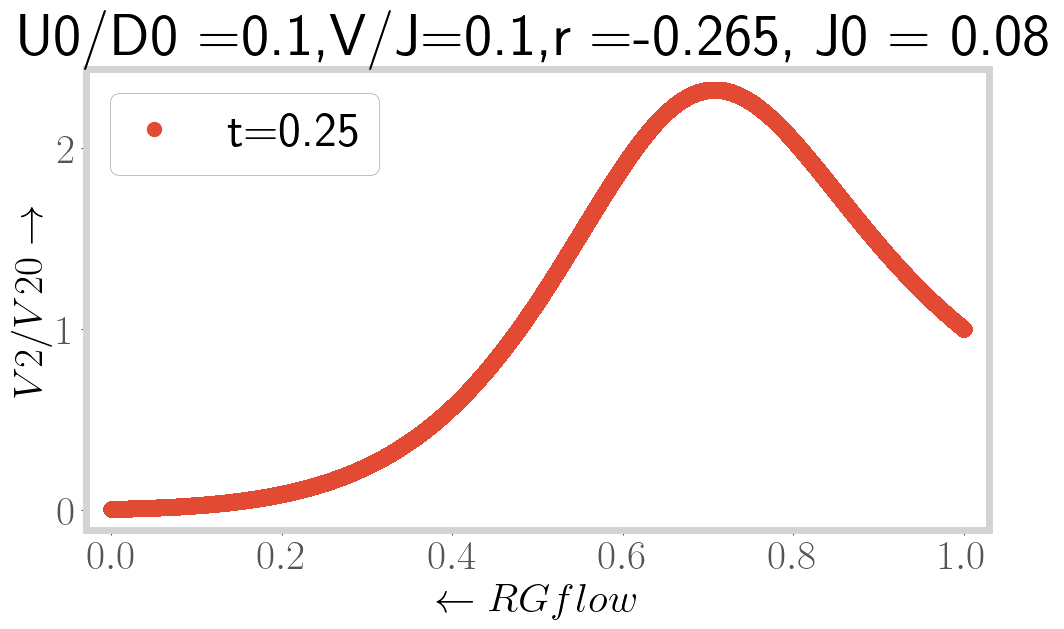

[1.         1.00000069 1.00000137 ... 3.53505363 3.53505363 3.53505363]


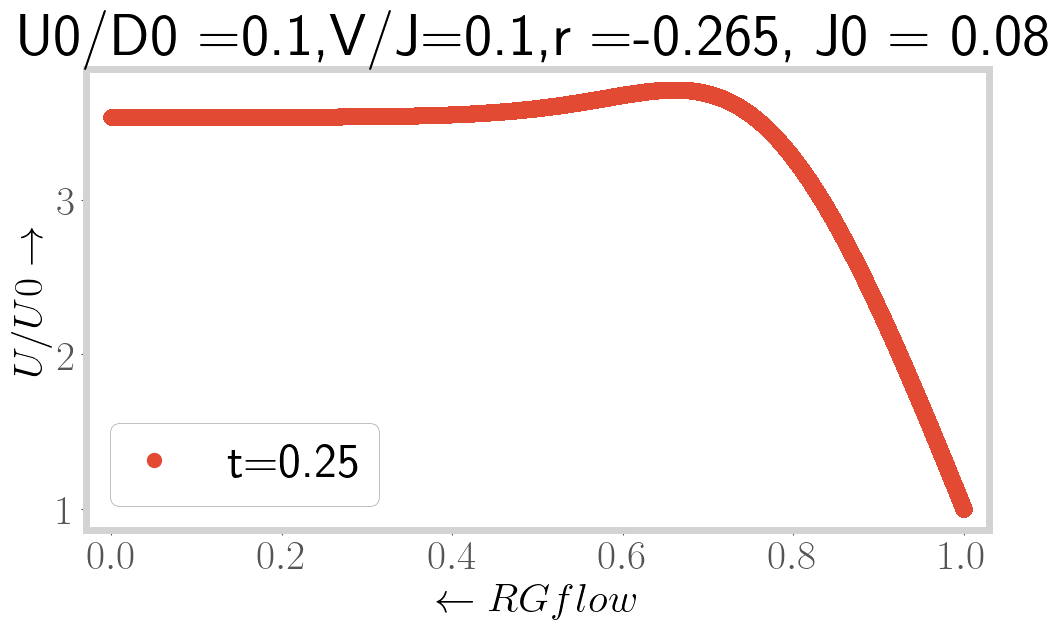

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.25])
D0 = 100
J0 = D0 * 0.08
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.265 * J0
t_s = a * D0
d = 0.000005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

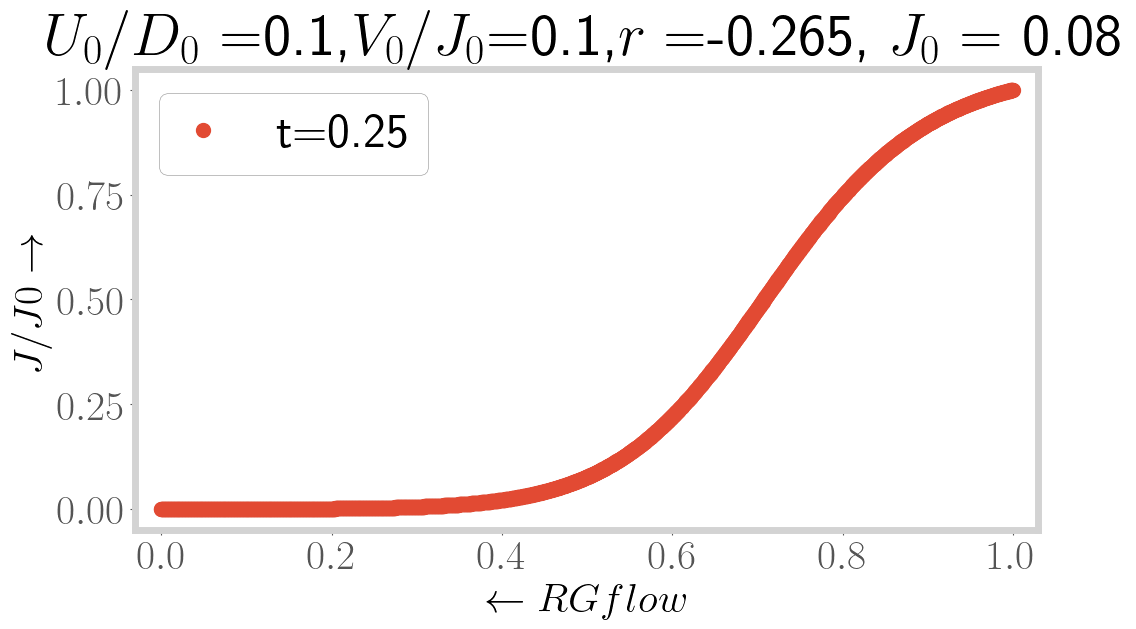

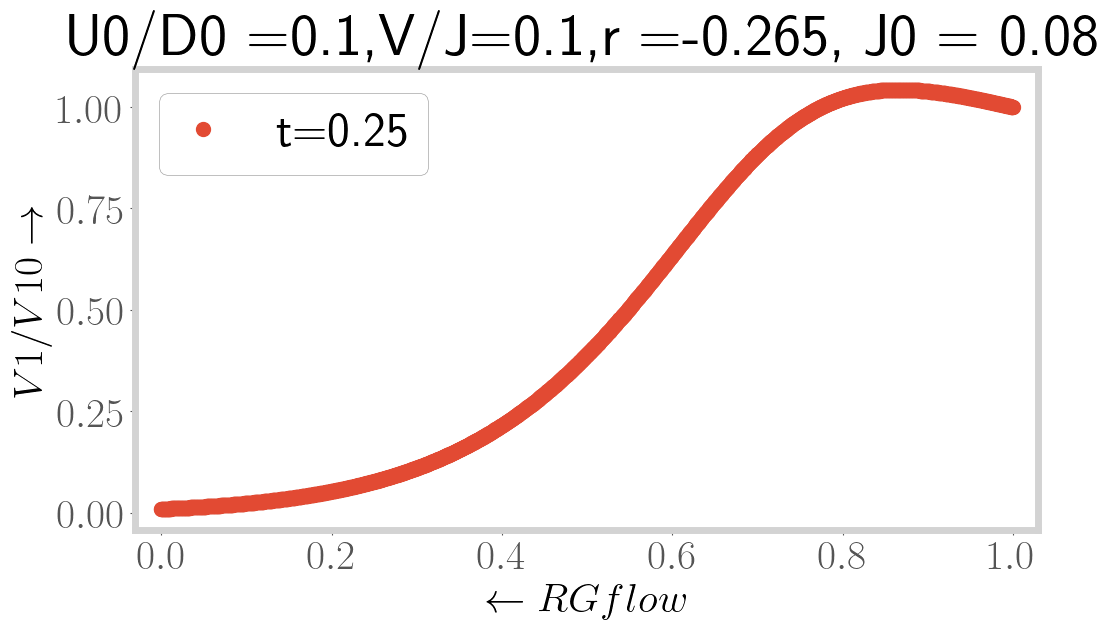

[1.         1.00190528 1.00381468 ... 0.00468459 0.00463738 0.00459053]


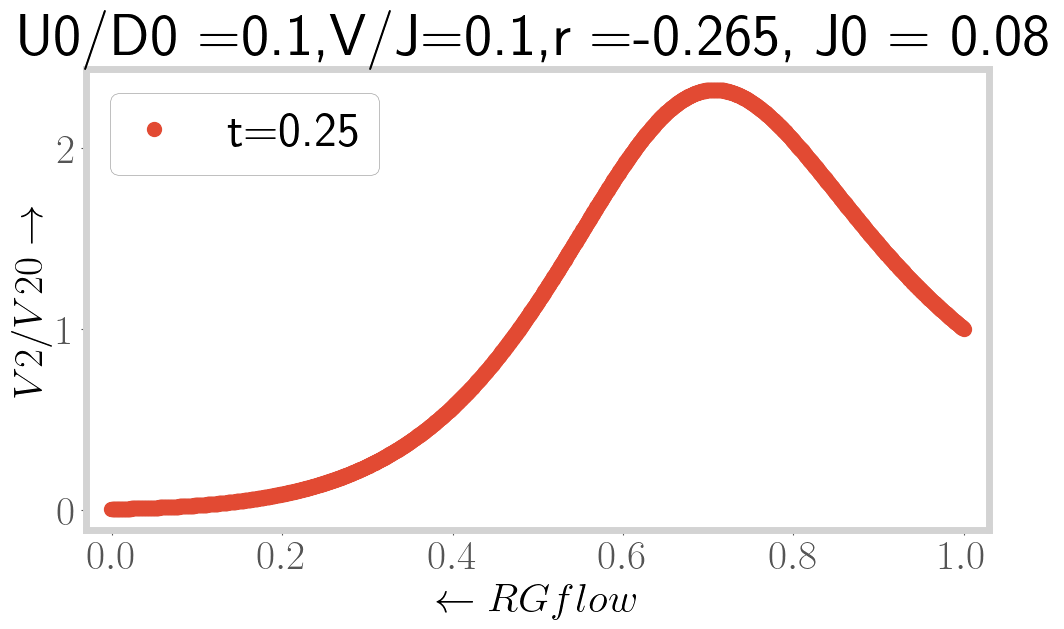

[1.         1.00686313 1.01372395 ... 3.53721388 3.53721373 3.53721359]


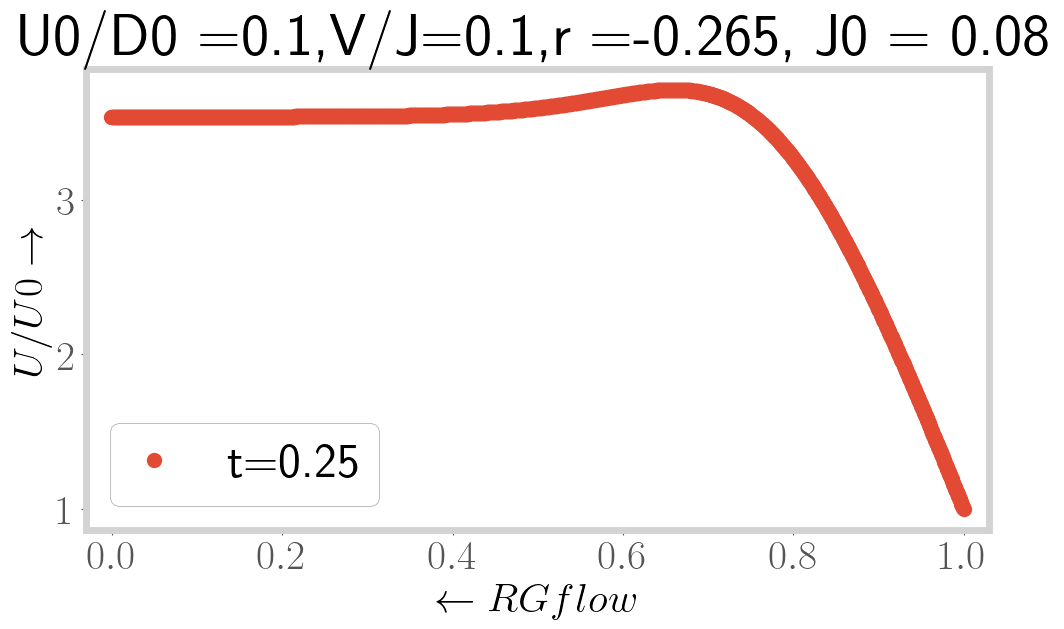

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
    return V1, V2, J, U, D

a = np.array([0.25])
D0 = 100
J0 = D0 * 0.08
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
U0 = 0.1 * D0
U_b = -0.265 * J0
t_s = a * D0
d = 0.05   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.title(r'$U_0/D_0$ ={U0},$V_0/J_0$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    #plt.axvline(x = (D[-1]/D0))
    #plt.ylim(-10,200)
    plt.title('U0/D0 ={U0},V/J={V_by_J},r ={r}, J0 = {J0}'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

# Semi-elliptic DOS

100%|█████████████████████████████████████████| 200/200 [21:32<00:00,  6.46s/it]


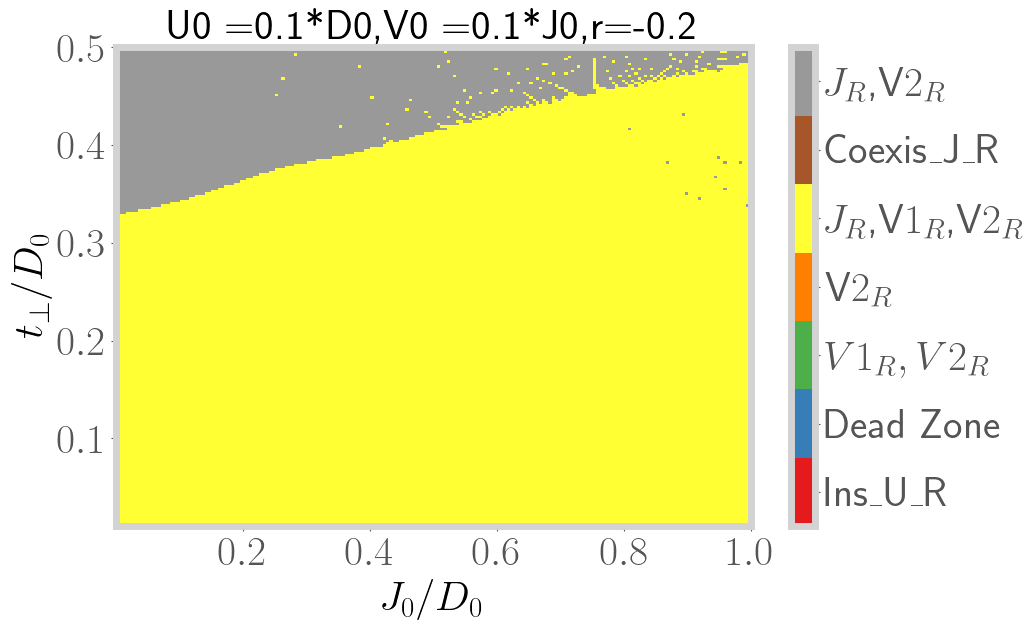

In [44]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.2
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [21:27<00:00,  6.44s/it]


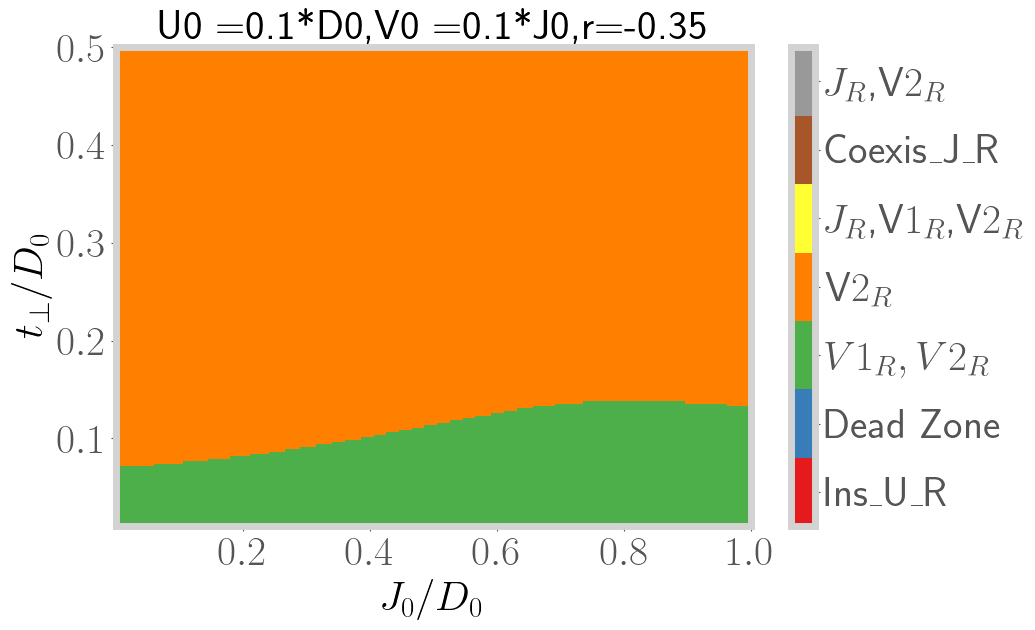

In [45]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.35
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|█████████████████████████████████████████| 200/200 [21:28<00:00,  6.44s/it]


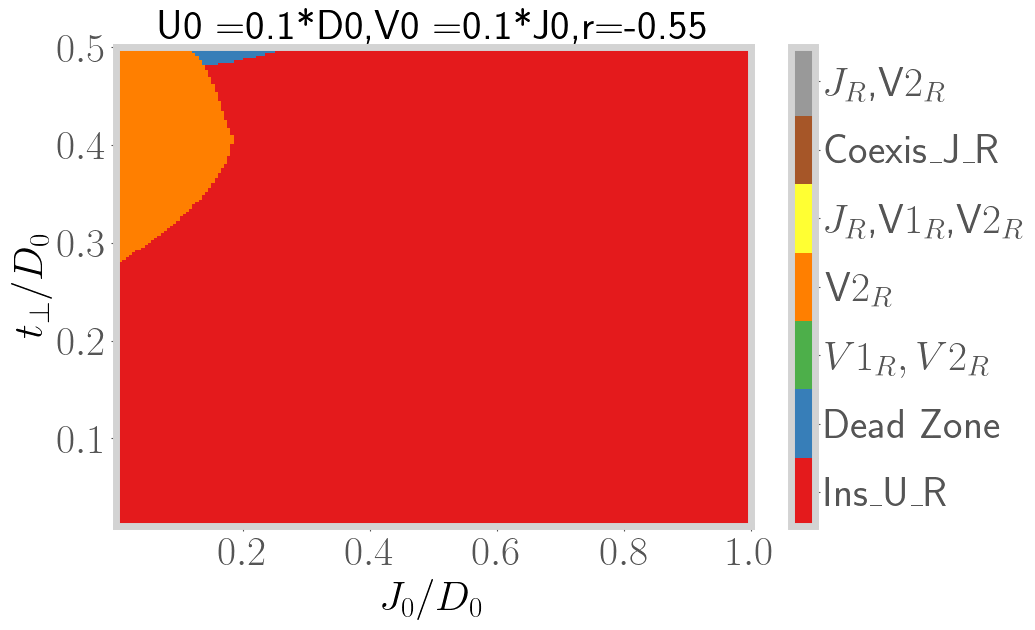

In [47]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(U0= U0/D0,V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
U0 = 0.1 * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
x = np.linspace(0.01, 0.5, 200) * D0
V_by_J = 0.1
U_b_by_J = -0.55
RG(y,U0,U_b_by_J,D0,x,V_by_J,d=0.05)

    

100%|███████████████████████████████████████████| 40/40 [00:51<00:00,  1.30s/it]


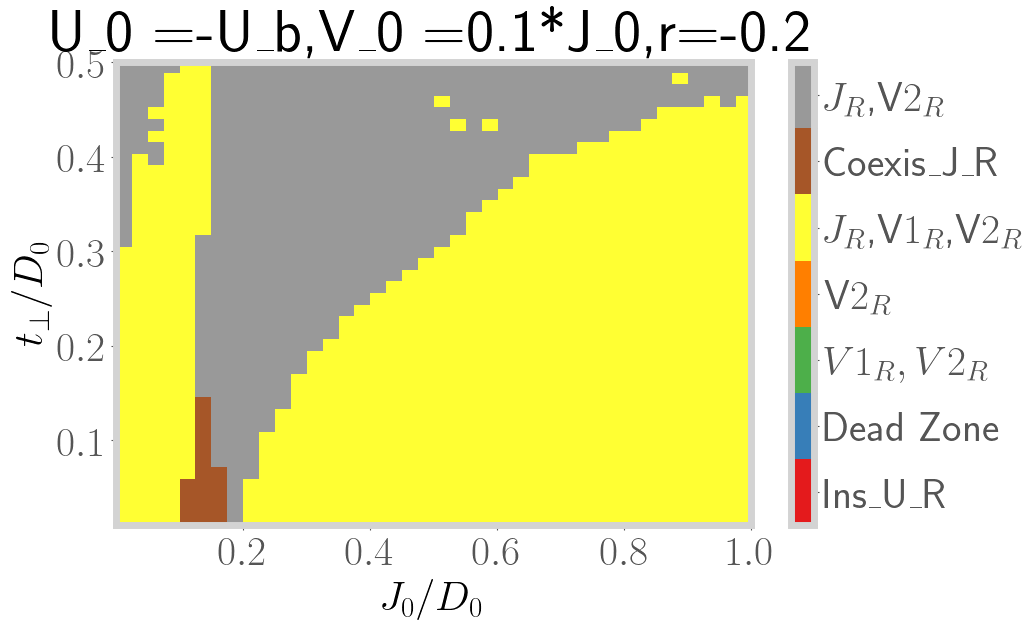

In [43]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -U_b_by_J *J0 * D0
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                #print (J[-1]/J0, V1[-1]/V10,V2[-1]/V20,U[-1]/U0)
            #print (flag,J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U_0 =-U_b,V_0 ={V_by_J}*J_0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J))
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("N-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(U0= U0,V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 100
#U0 = 0.1 * D0
y = np.linspace(0.001, 1, 40) * D0
#print(y)
x = np.linspace(0.01, 0.5, 40) * D0
V_by_J = 0.1
U_b_by_J = -0.2
RG(y,U_b_by_J,D0,x,V_by_J,d=0.05)

    

# Semieliptic DOS with U0 =-50U_b

100%|██████████████████████████████████████| 600/600 [12:13:34<00:00, 73.36s/it]


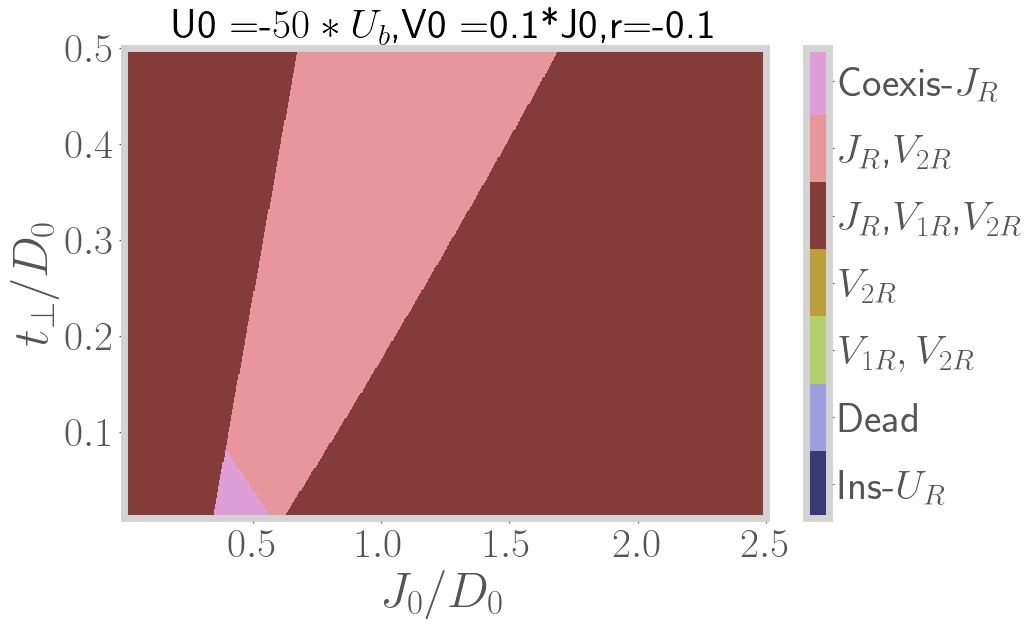

In [1]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.1
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:22:21<00:00, 74.24s/it]


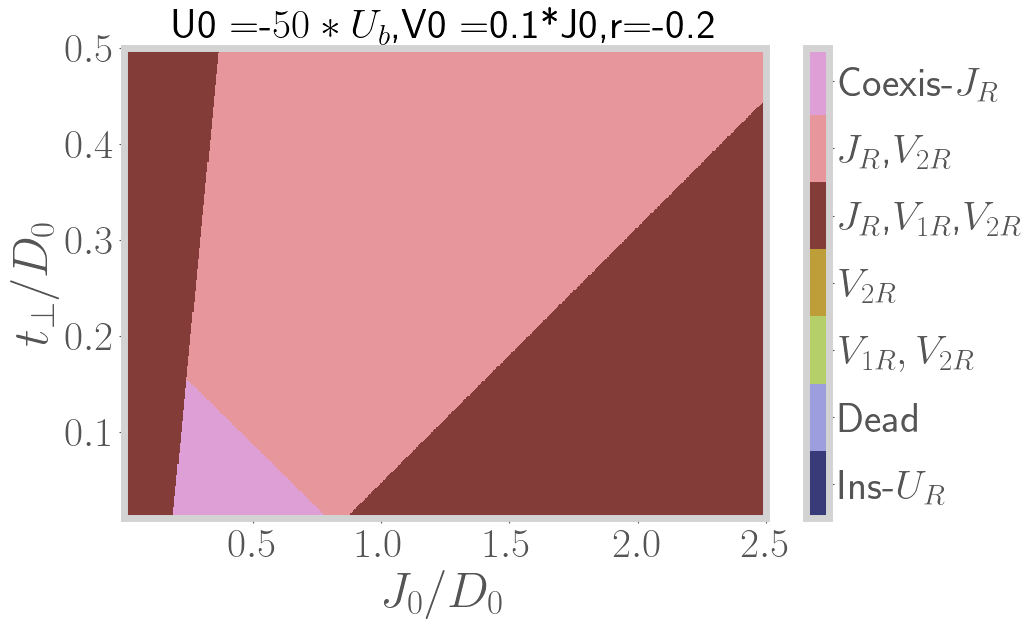

In [2]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.2
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:12:02<00:00, 73.20s/it]


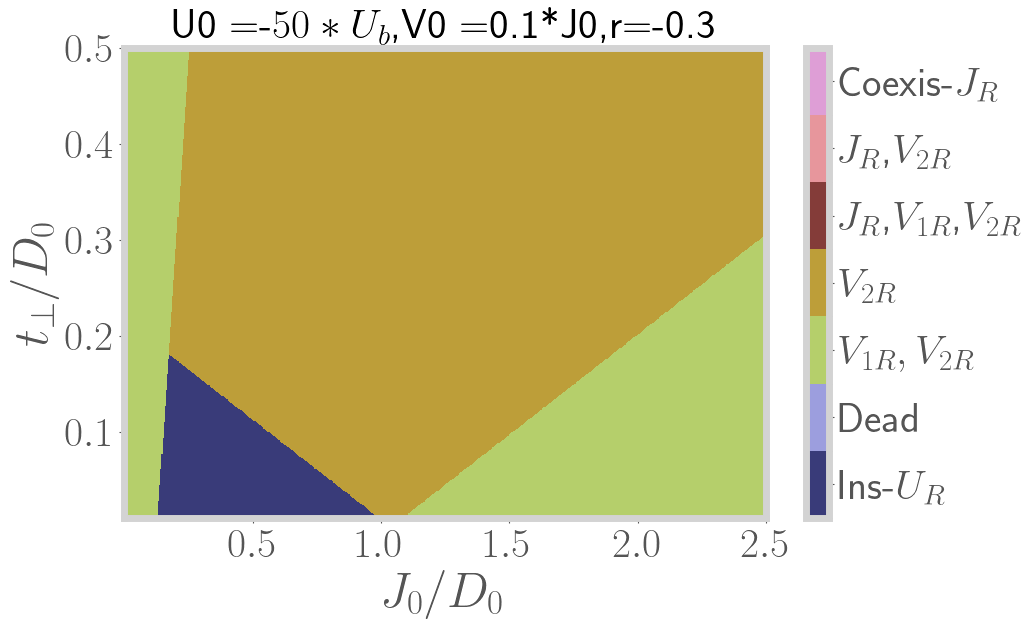

In [3]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.3
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:26:45<00:00, 74.68s/it]


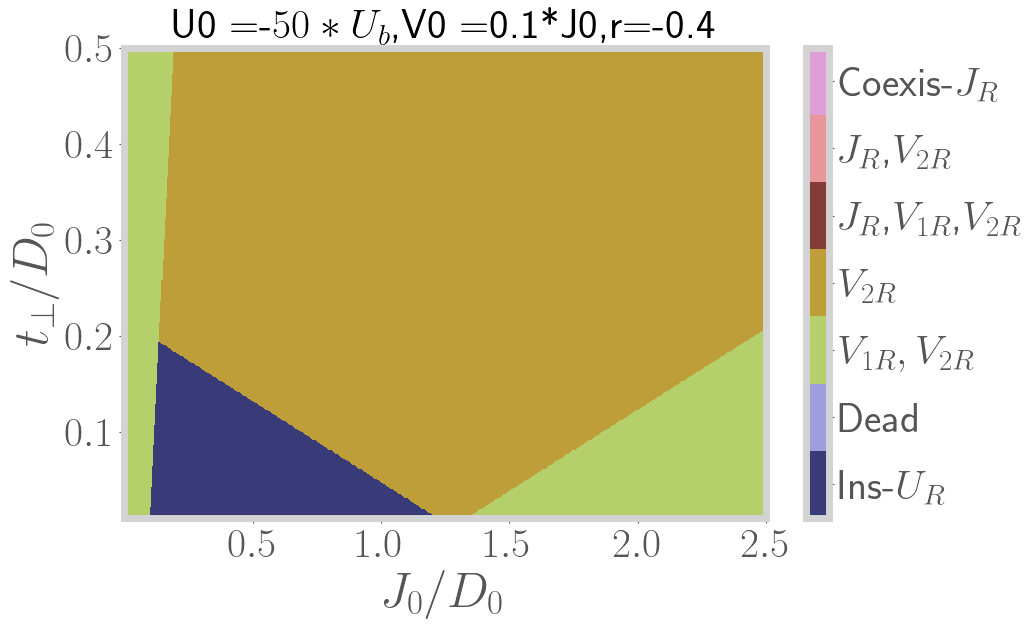

In [4]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.4
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:26:14<00:00, 74.62s/it]


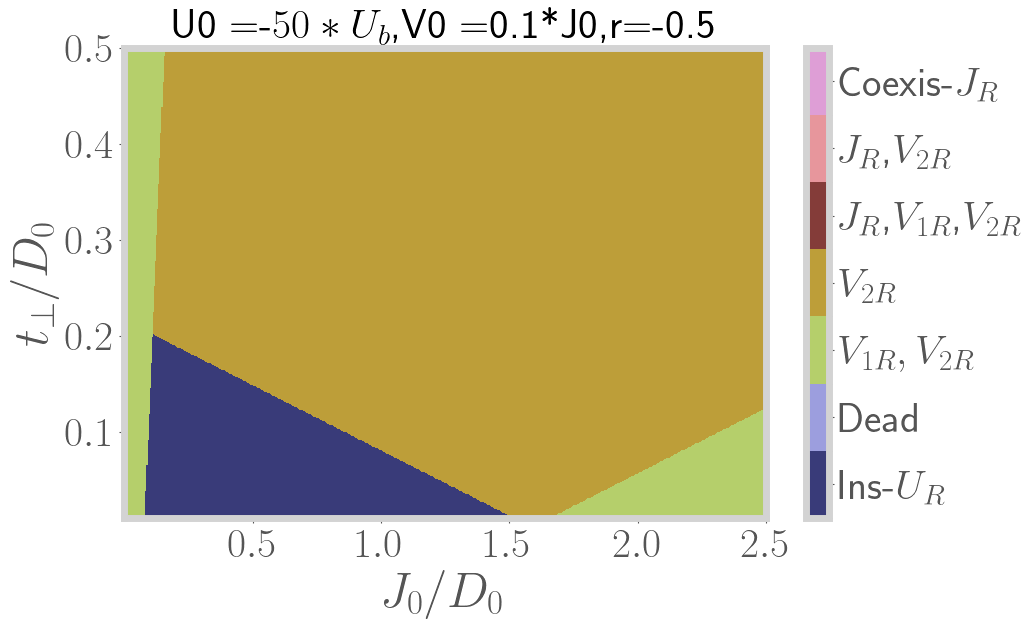

In [5]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.5
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:30:02<00:00, 75.00s/it]


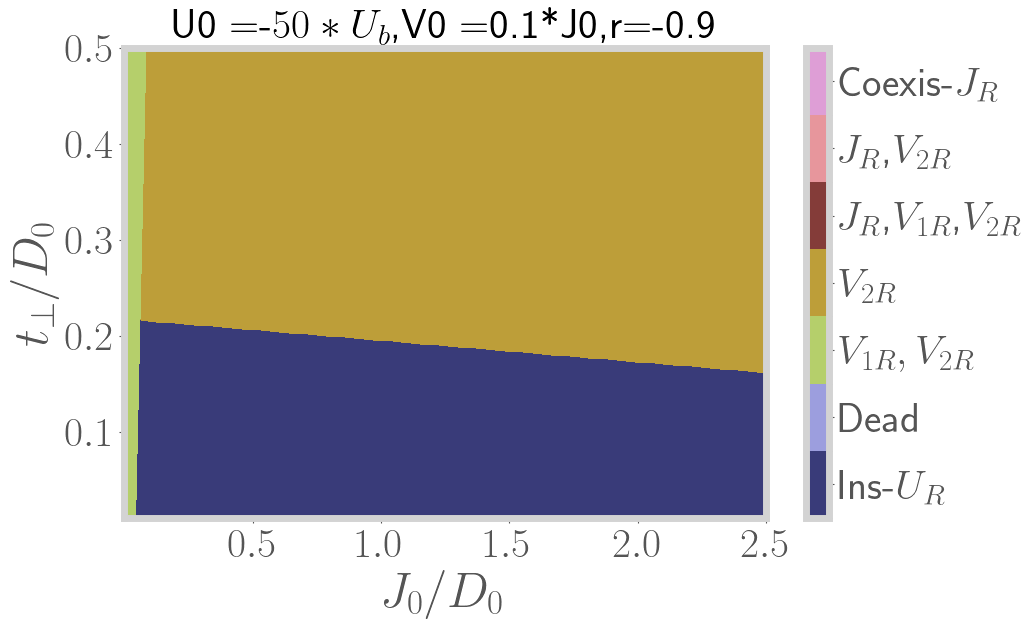

In [6]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.9
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

100%|██████████████████████████████████████| 600/600 [12:20:29<00:00, 74.05s/it]


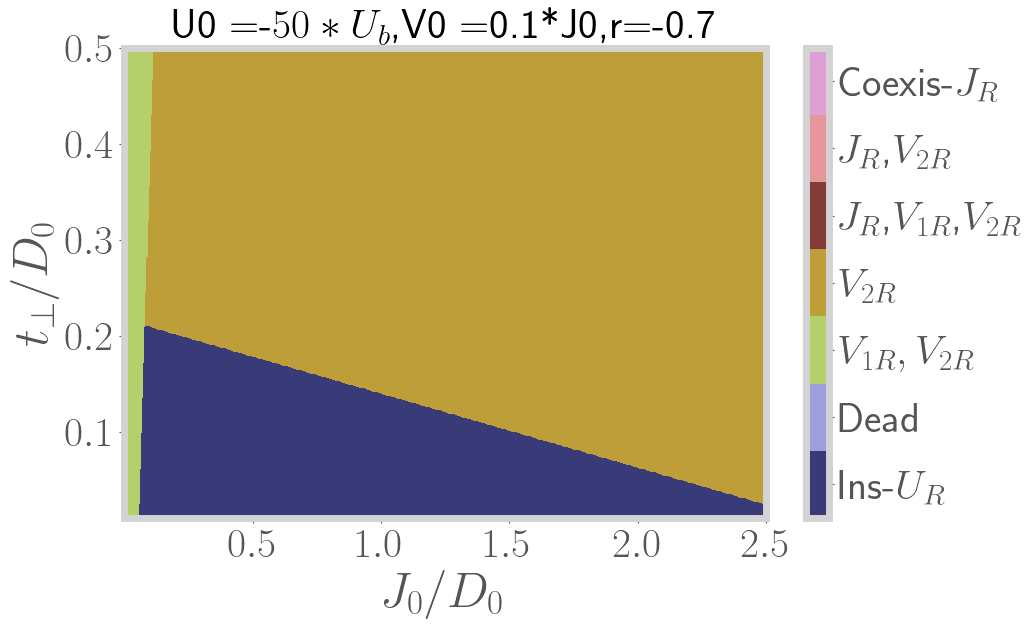

In [7]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,U_b_by_J,D0,x,V_by_J,d=0.1):
    W = []
    
    for t in tqdm(x):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = U_b_by_J * J0
            U0 = -50 * U_b
            #print('------')
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
 
    #print(W)
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto", extent=(min(y)/D0, max(y)/D0, min(x)/D0, max(x)/D0),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$t_{\perp}/D_0$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 =-$50*U_b$,V0 ={V_by_J}*J0,r={U_b_by_J}'.format(V_by_J =V_by_J,U_b_by_J = U_b_by_J),fontsize='medium')
    #plt.savefig("St-U_0 =-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.pdf".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    #plt.savefig("St-U_0=-U_b,V_0 ={V_by_J}*J0,U_b ={U_b_by_J}*J0.png".format(V_by_J =V_by_J,U_b_by_J =U_b_by_J), bbox_inches='tight')
    plt.show()


D0 = 1
#U0 = 0.1 * D0
y = np.linspace(0.001, 2.5, 600) * D0
#print(y)
x = np.linspace(0.01, 0.5, 600) * D0
V_by_J = 0.1
U_b_by_J = -0.7
RG(y,U_b_by_J,D0,x,V_by_J,d=0.0001)

    

In [ ]:
## Semi-elliptic DOS with U= -U_b RG Flow

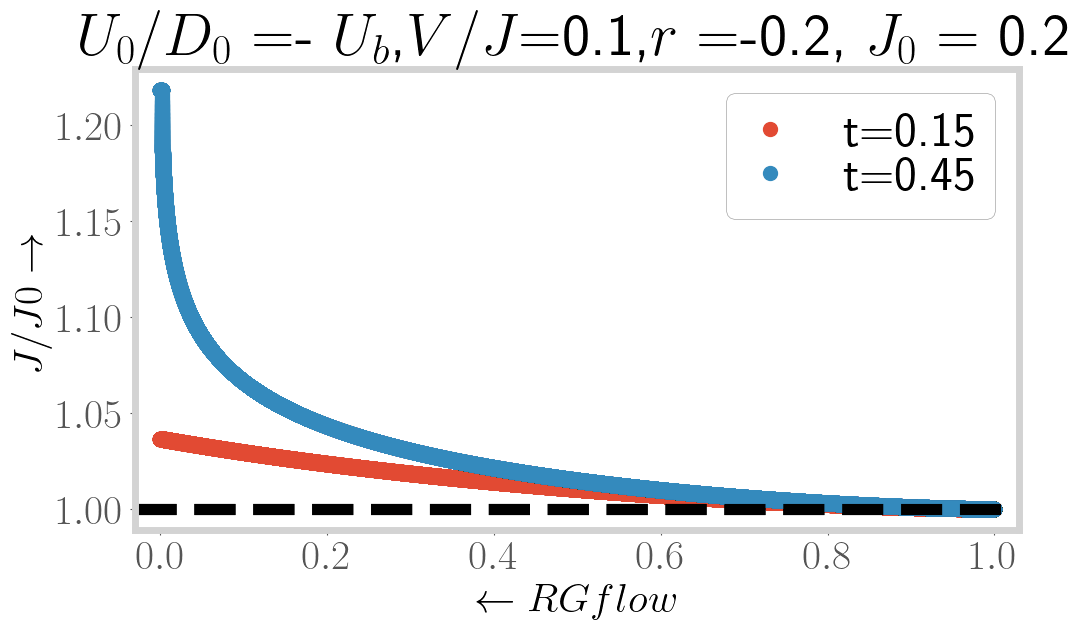

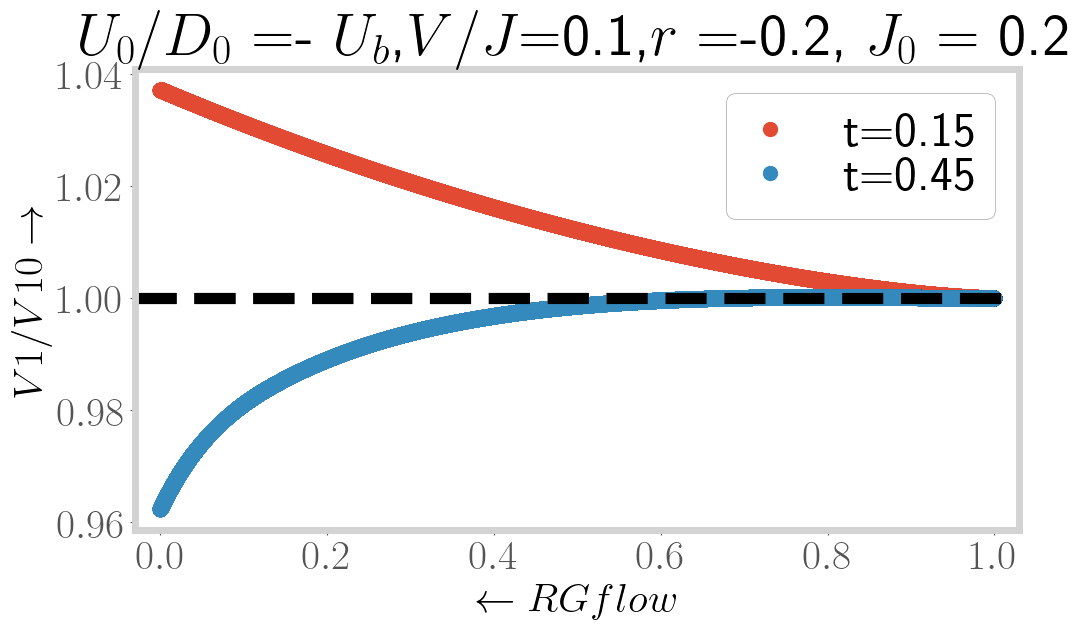

[1.         1.         1.         ... 1.10322281 1.10322406 1.10322531]
[1.         1.         1.         ... 6.38344552 6.38344467 6.38344383]


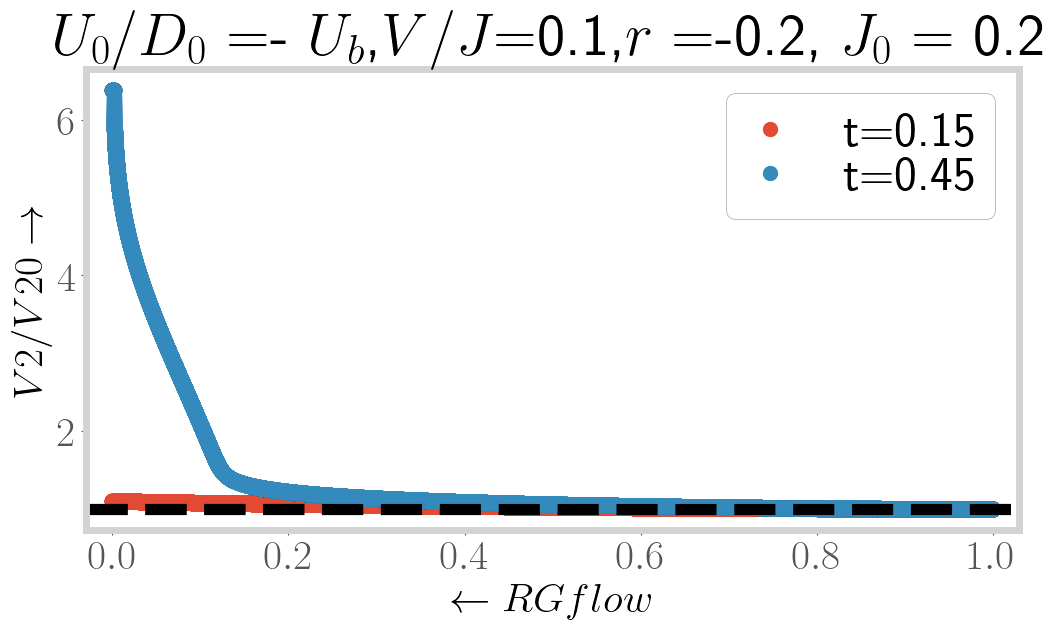

[1.         1.         1.00000002 ... 2.67760831 2.67762447 2.67764064]
[1.         1.         1.00000003 ... 0.         0.         0.        ]


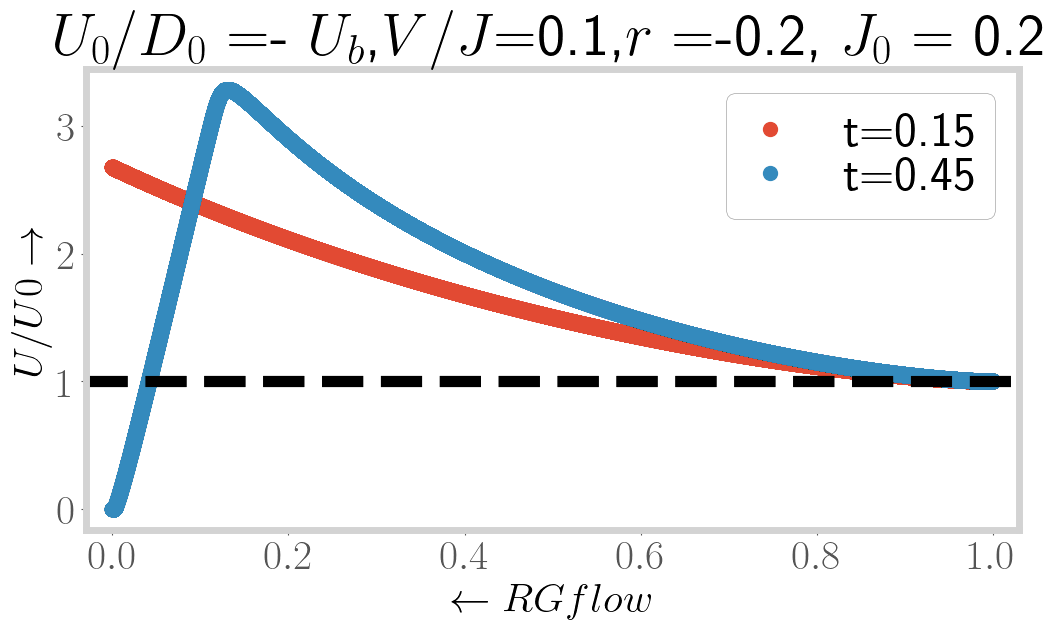

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
a = np.array([0.15,0.45])
D0 = 100
J0 = D0 * 0.2
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
#U0 = 0.2 * D0
U_b = -0.2 * J0
U0 = - U_b
t_s = a * D0
d = 0.0005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    #plt.ylim(-10,200)
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

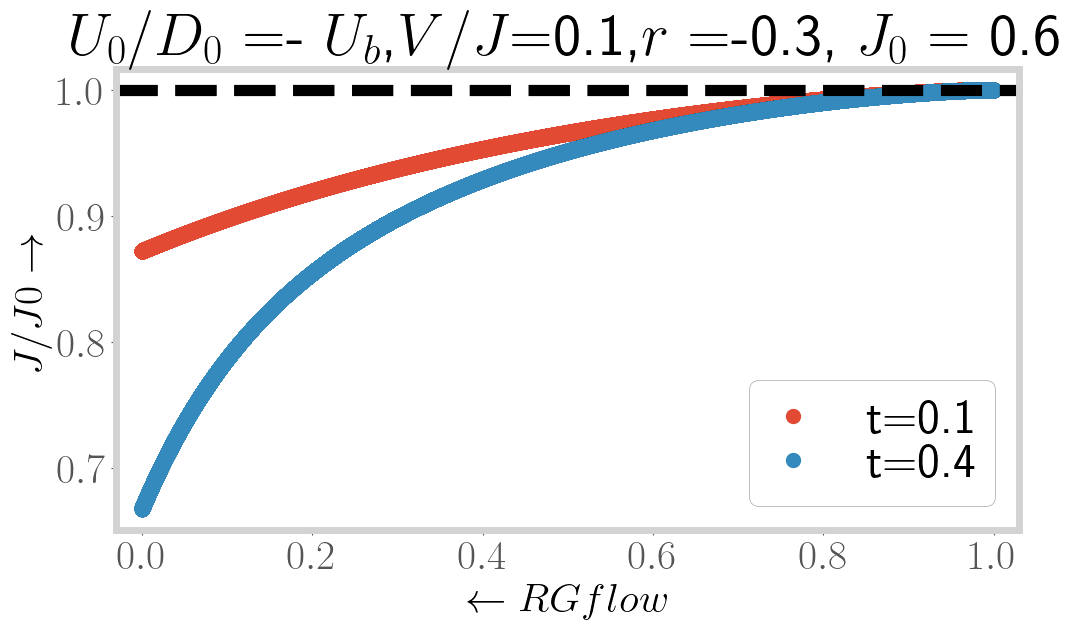

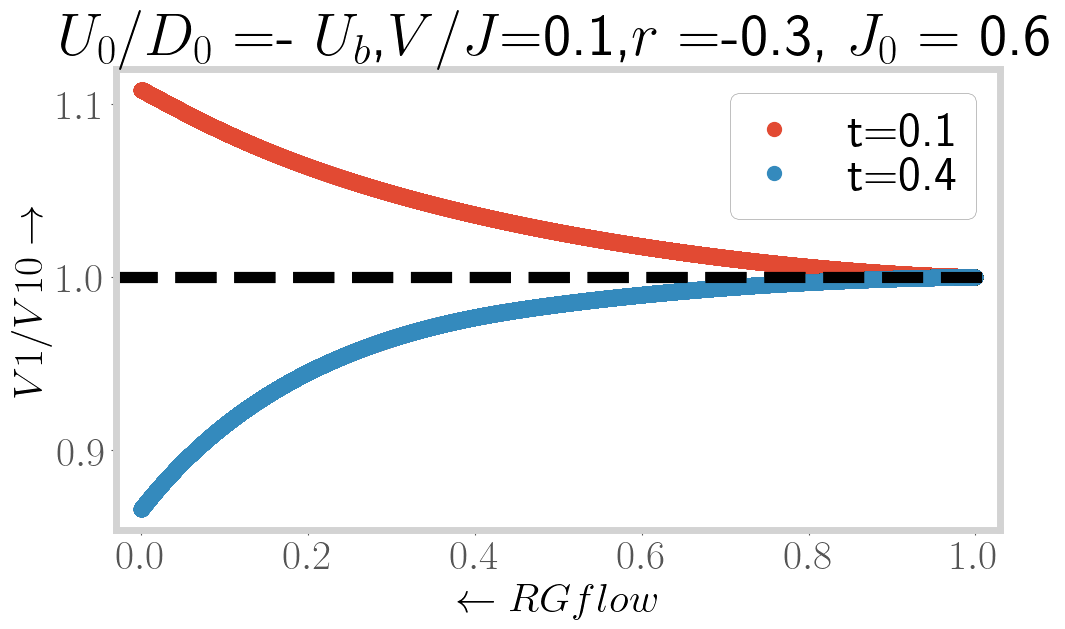

[1.         1.         1.         ... 1.56509981 1.56512477 1.56514972]
[1.         1.         1.         ... 4.75933467 4.75937237 4.75941008]


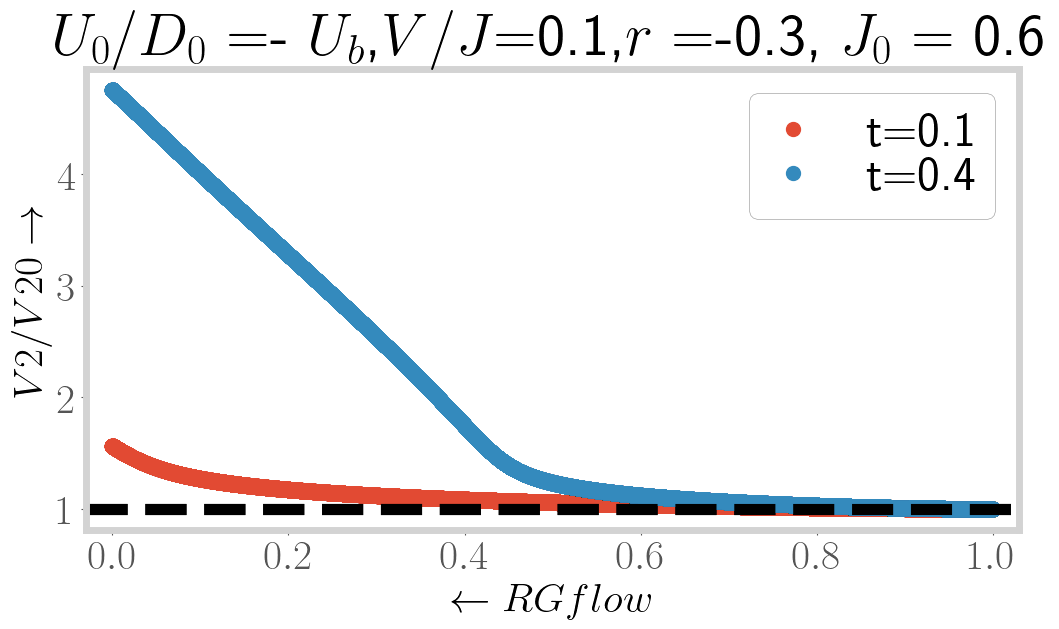

[1.         1.         1.00000004 ... 3.25062716 3.25060677 3.25058637]
[1.         1.         1.00000005 ... 0.         0.         0.        ]


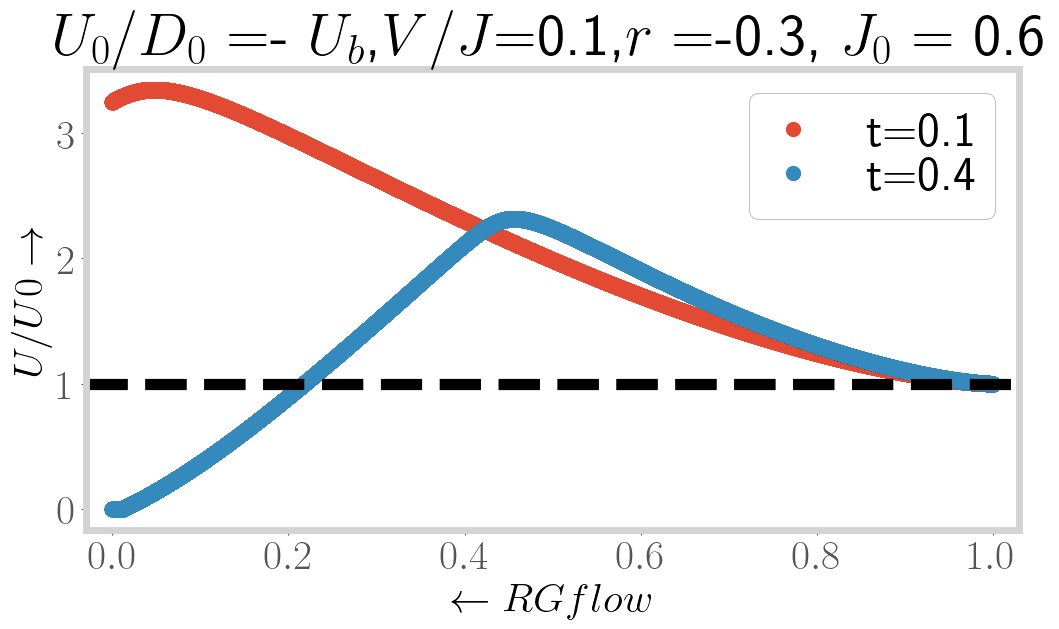

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
a = np.array([0.1,0.4])
D0 = 100
J0 = D0 * 0.6
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
#U0 = 0.2 * D0
U_b = -0.3 * J0
U0 = - U_b
t_s = a * D0
d = 0.0005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V1/V10 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V2/V20 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    #plt.ylim(-10,200)
    plt.title('$U_0$/$D_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)

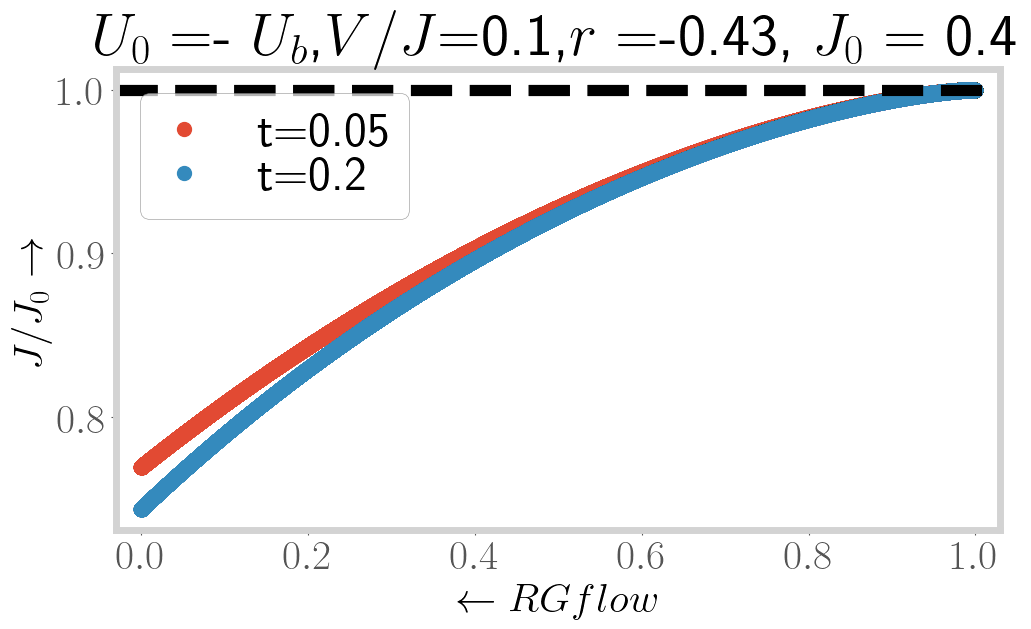

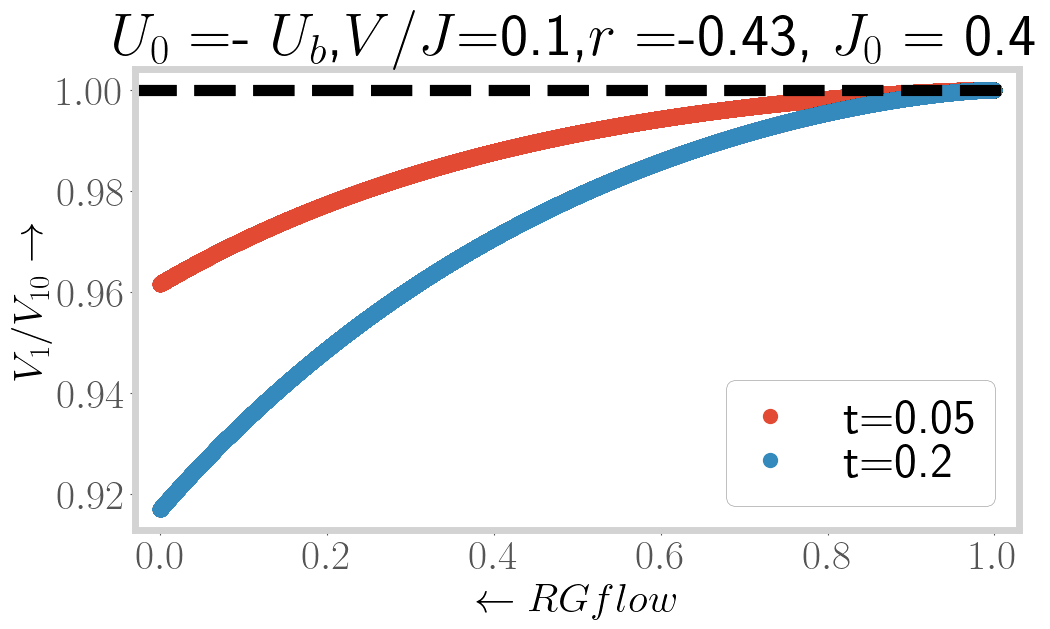

[1.         1.         1.         ... 0.99050148 0.99050128 0.99050109]
[1.         1.         1.         ... 1.04860083 1.04860145 1.04860208]


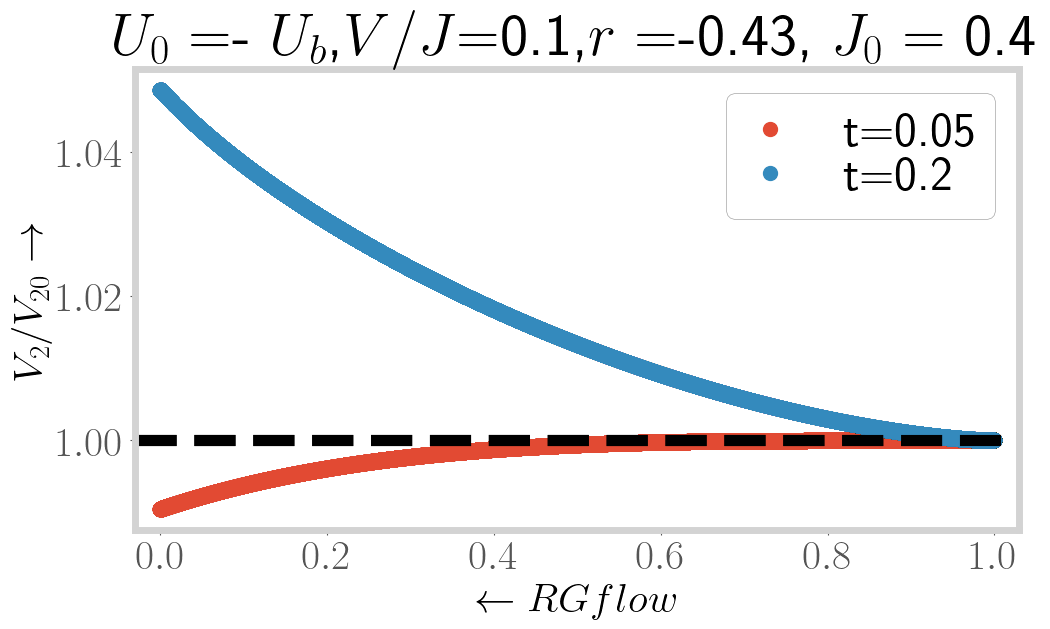

[1.         1.         1.00000002 ... 2.08183256 2.08183918 2.0818458 ]
[1.         1.         1.00000002 ... 2.13336378 2.13336985 2.13337591]


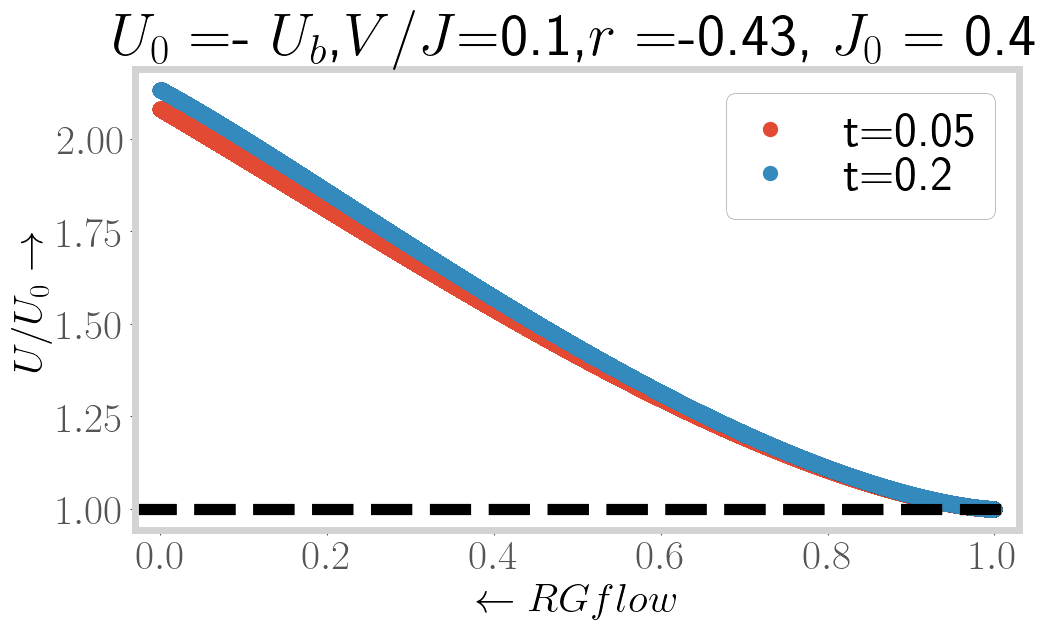

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(V1[-1] + delta_V_1)
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(V2[-1] + delta_V_2)
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
a = np.array([0.05,0.2])
D0 = 100
J0 = D0 * 0.4
V_by_J = 0.1
V10 = V_by_J * J0
V20 = V_by_J * J0
#U0 = 0.2 * D0
U_b = -0.43 * J0
U0 = - U_b
t_s = a * D0
d = 0.0005   
for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(J)/J0,'o',label = 't={t}'.format(t =t/D0))
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$J/J_0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('JRgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    plt.plot(np.array(D)/D0, np.array(V1)/V10, 'o', label = 't={t}'.format(t =t/D0))
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V_1/V_{10} \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V1RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(V2)/V20)
    plt.plot(np.array(D)/D0, np.array(V2)/V20, 'o',label = 't={t}'.format(t =t/D0) )
    plt.xlabel(r'$ \leftarrow RG flow$')
    plt.ylabel(r'$ V_2/V_{20} \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    plt.title('$U_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('V2RgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

for t in t_s:    
    V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
    print(np.array(U)/U0)
    plt.plot(np.array(D)/D0, np.array(U)/U0,'o',label = 't={t}'.format(t =t/D0) )
    #plt.yscale("log")
    plt.xlabel(r'$\leftarrow RG flow$')
    plt.ylabel(r'$U/U_0 \rightarrow$')
    plt.axhline(y = 1, linestyle ="--",color ='black')
    #plt.ylim(-10,200)
    plt.title('$U_0$ =- $U_b$,$V$/$J$={V_by_J},$r$ ={r}, $J_0$ = {J0}'.format(V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0))
    plt.legend()
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.pdf'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
#plt.savefig('URgflowU0 ={U0}*D0,V={V_by_J}*J,r ={r}, J0 = {J0}.png'.format(U0= U0/D0,V_by_J = V_by_J,r =U_b/J0, J0 = J0/D0), bbox_inches='tight')
plt.show()

#RG(4,4,8)

#RG_flow(J0,U0,D0,t,V10,V20,U_b,d = 0.05)